# Import data and pre-processing

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
from lineartree import LinearTreeClassifier, LinearTreeRegressor
import timeit
import math


#import graphviz 

from model_tree import *
from reg_tree import *


In [57]:
df = pd.read_csv('../datasets/Automobile_data.csv')

In [58]:
sum=0
for col in df.columns:
    if('?' in df[col].values):
        sum = sum + len(df[df[col]=='?'])
        print(col , "  has " , str(len(df[df[col]=='?'])), "missing values")
print ("Total # of missing values",sum)

normalized-losses   has  41 missing values
num-of-doors   has  2 missing values
bore   has  4 missing values
stroke   has  4 missing values
horsepower   has  2 missing values
peak-rpm   has  2 missing values
price   has  4 missing values
Total # of missing values 59


In [59]:
df=df.replace('?',np.nan)

In [5]:
df_check=df.drop(["normalized-losses"], axis=1)
df_check[df_check.isnull().T.any().T]

symboling     make fuel-type aspiration num-of-doors body-style  \
9            0     audi       gas      turbo          two  hatchback   
27           1    dodge       gas      turbo          NaN      sedan   
44           1    isuzu       gas        std          two      sedan   
45           0    isuzu       gas        std         four      sedan   
55           3    mazda       gas        std          two  hatchback   
56           3    mazda       gas        std          two  hatchback   
57           3    mazda       gas        std          two  hatchback   
58           3    mazda       gas        std          two  hatchback   
63           0    mazda    diesel        std          NaN      sedan   
129          1  porsche       gas        std          two  hatchback   
130          0  renault       gas        std         four      wagon   
131          2  renault       gas        std          two  hatchback   

    drive-wheels engine-location  wheel-base  length  ...  engine-size  \
9            4wd           front        99.5   178.2  ...          131   
27           fwd           front        93.7   157.3  ...           98   
44           fwd           front        94.5   155.9  ...           90   
45           fwd           front        94.5   155.9  ...           90   
55           rwd           front        95.3   169.0  ...           70   
56           rwd           front        95.3   169.0  ...           70   
57           rwd           front        95.3   169.0  ...           70   
58           rwd           front        95.3   169.0  ...           80   
63           fwd           front        98.8   177.8  ...          122   
129          rwd           front        98.4   175.7  ...          203   
130          fwd           front        96.1   181.5  ...          132   
131          fwd           front        96.1   176.8  ...          132   

     fuel-system  bore stroke compression-ratio  horsepower peak-rpm city-mpg  \
9           mpfi  3.13    3.4               7.0         160     5500       16   
27          mpfi  3.03   3.39               7.6         102     5500       24   
44          2bbl  3.03   3.11               9.6          70     5400       38   
45          2bbl  3.03   3.11               9.6          70     5400       38   
55          4bbl   NaN    NaN               9.4         101     6000       17   
56          4bbl   NaN    NaN               9.4         101     6000       17   
57          4bbl   NaN    NaN               9.4         101     6000       17   
58          mpfi   NaN    NaN               9.4         135     6000       16   
63           idi  3.39   3.39              22.7          64     4650       36   
129         mpfi  3.94   3.11              10.0         288     5750       17   
130         mpfi  3.46    3.9               8.7         NaN      NaN       23   
131         mpfi  3.46    3.9               8.7         NaN      NaN       23   

    highway-mpg  price  
9            22    NaN  
27           30   8558  
44           43    NaN  
45           43    NaN  
55           23  10945  
56           23  11845  
57           23  13645  
58           23  15645  
63           42  10795  
129          28    NaN  
130          31   9295  
131          31   9895  

[12 rows x 25 columns]

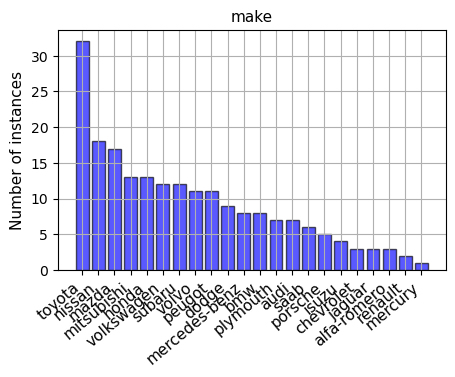

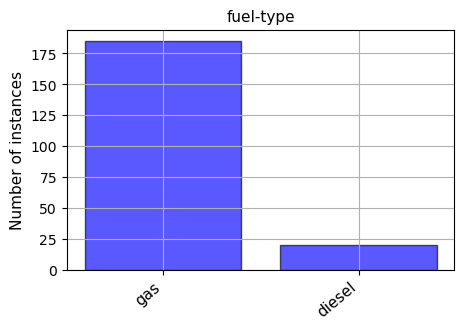

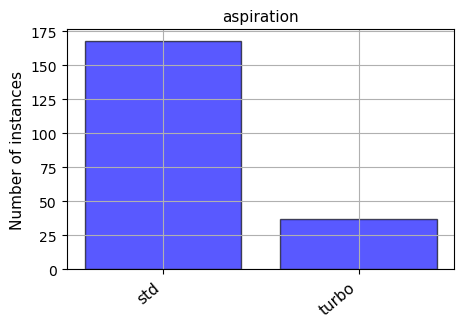

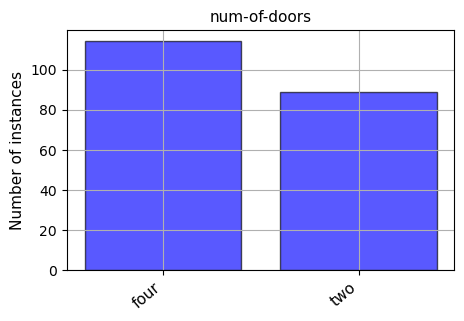

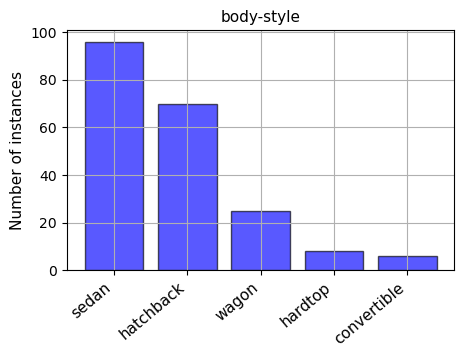

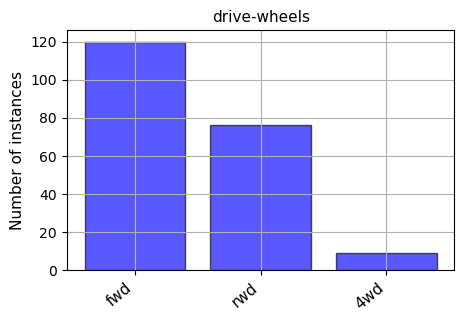

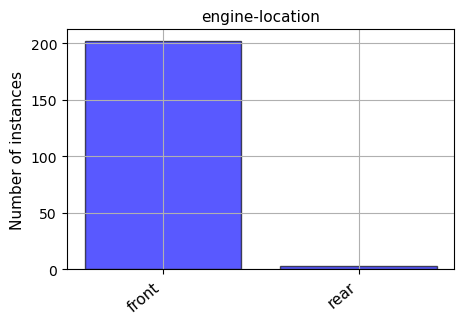

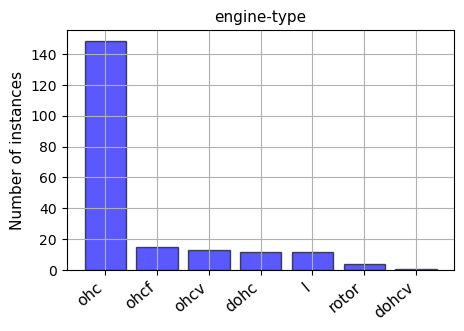

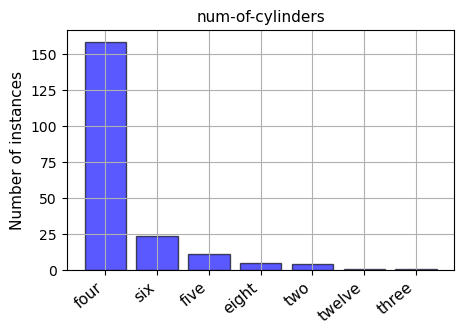

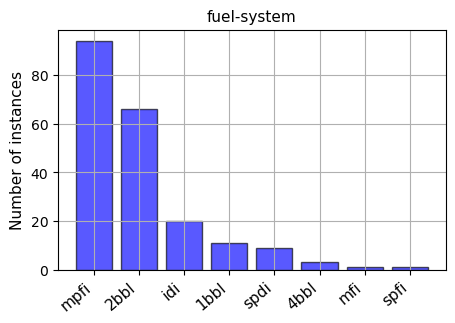

In [60]:
my_figsize = (5,5)

nominals = [2, 3, 4, 5, 6, 7, 8, 14, 15, 17]
counter =0
headers=list(df.columns.values)
for x in nominals:
    counter+=1
    name = headers[x]
    fig = plt.figure(figsize=my_figsize)
    my_counts = df[name].value_counts()
    plt.bar(x=my_counts.index, height=my_counts.values, color='blue', edgecolor='k', alpha=0.65)
    plt.title(name,fontsize=11)
    plt.ylabel("Number of instances",fontsize=11)
    plt.xticks(rotation=40,fontsize=11, ha="right")
    plt.grid()
    fig.subplots_adjust(bottom=0.4) 
    plt.savefig("car_nom{0}.pdf".format(counter))
    


In [6]:
print(df)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [7]:
# Create numerical values of ordinal features
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)

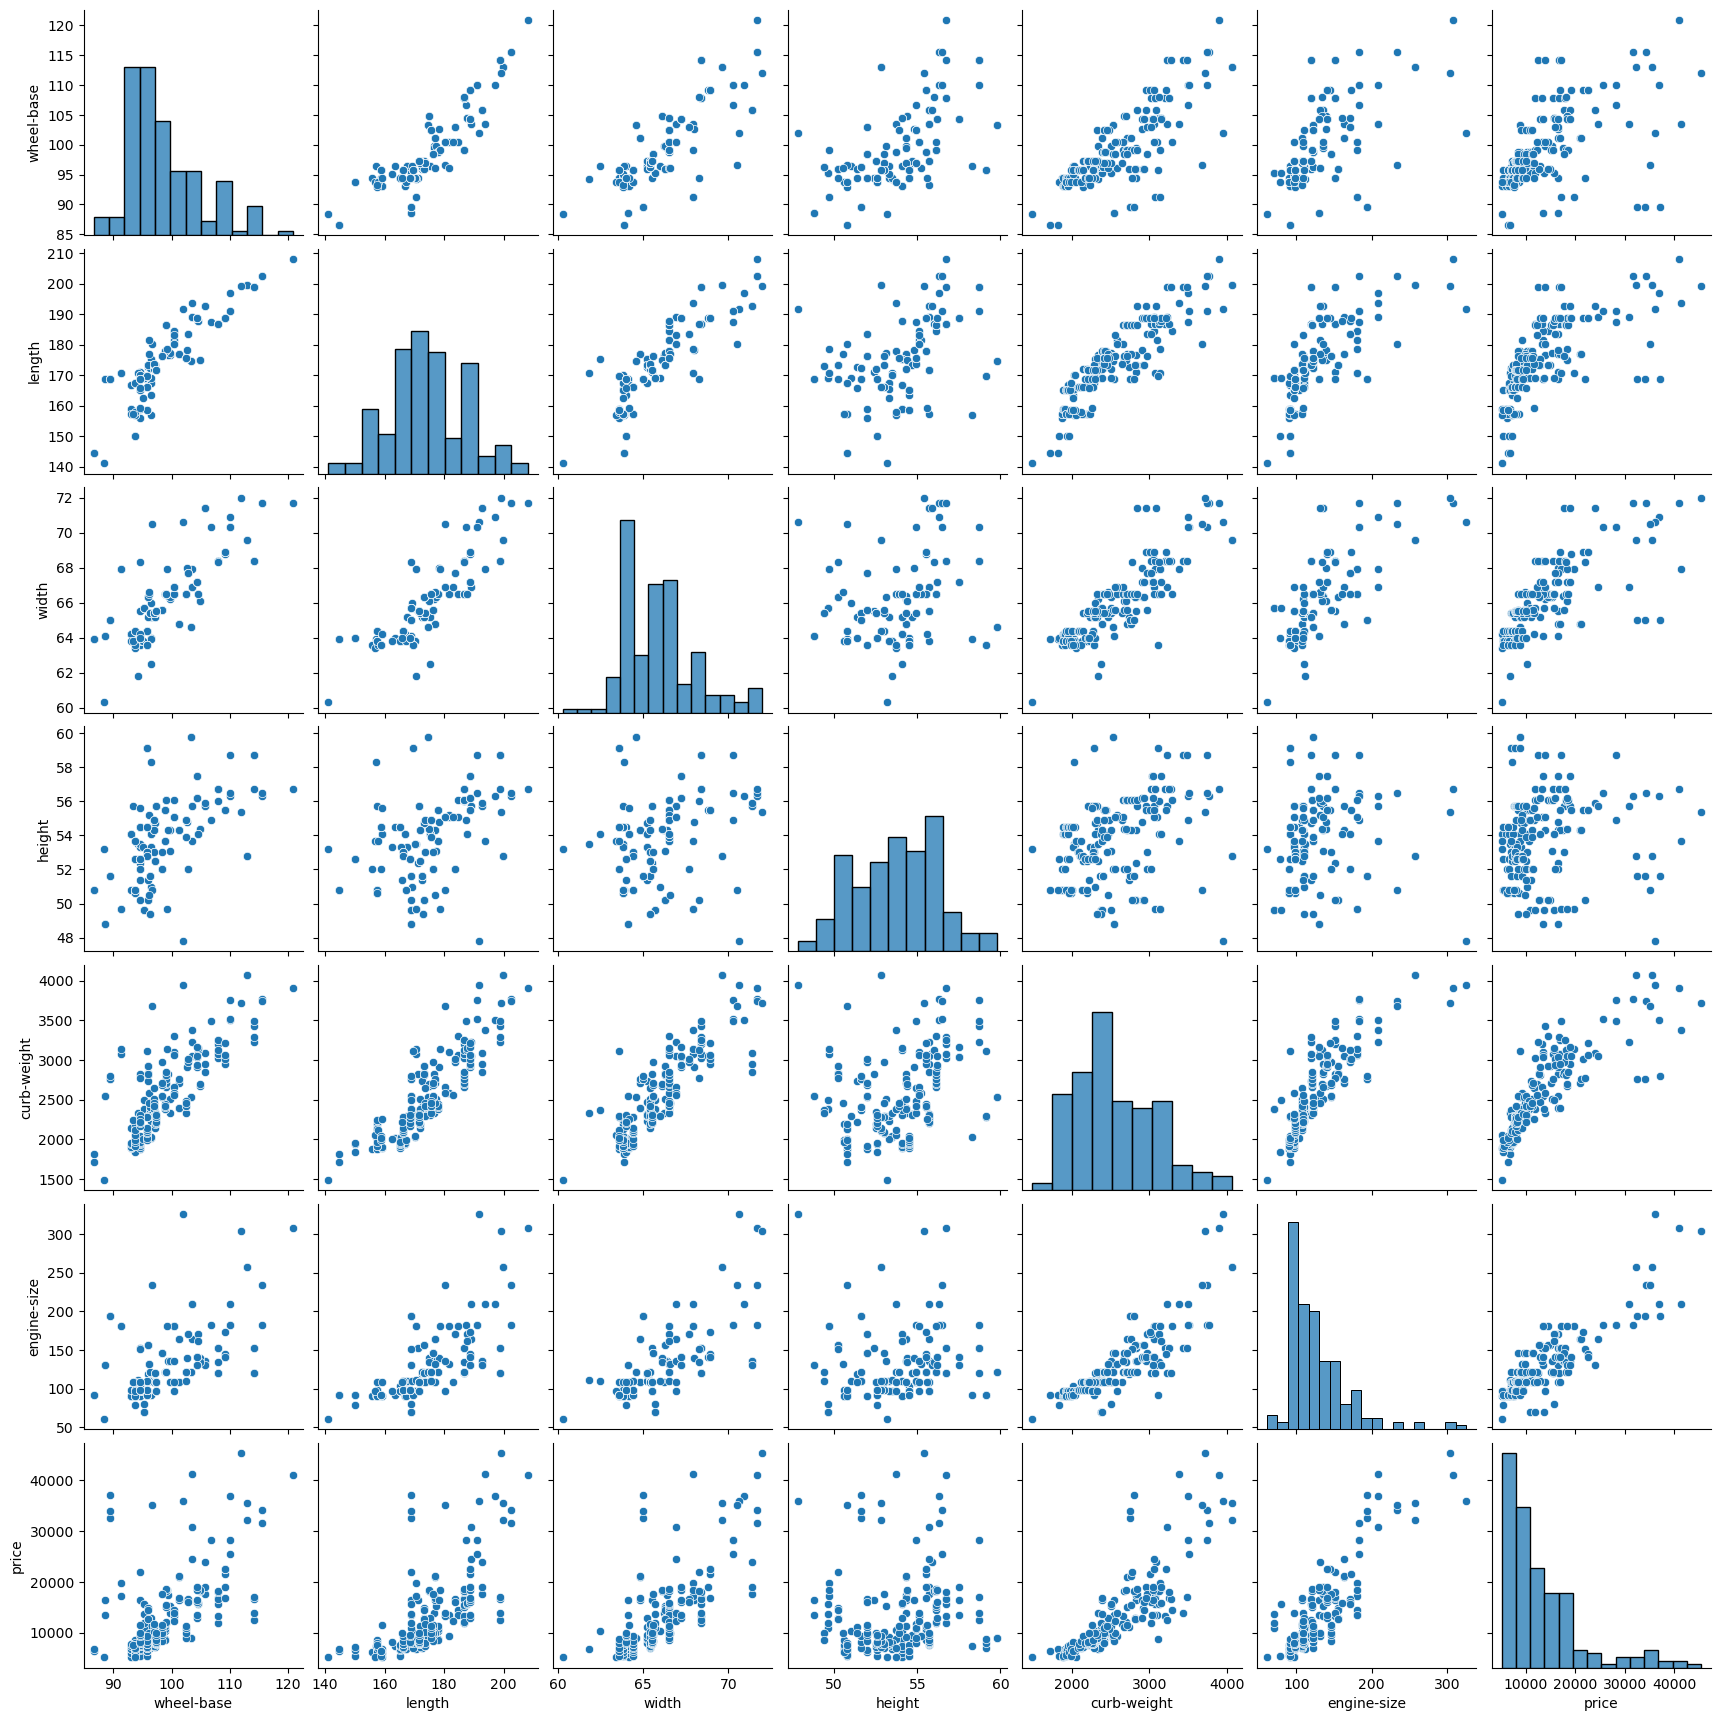

In [73]:
#pairplot based on car size attributes
df_delete= df
#df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]
#symboling is left out because it looks more categorical
ax = sns.pairplot(df_delete[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "price"]],palette='dark')


<Figure size 2000x2000 with 0 Axes>

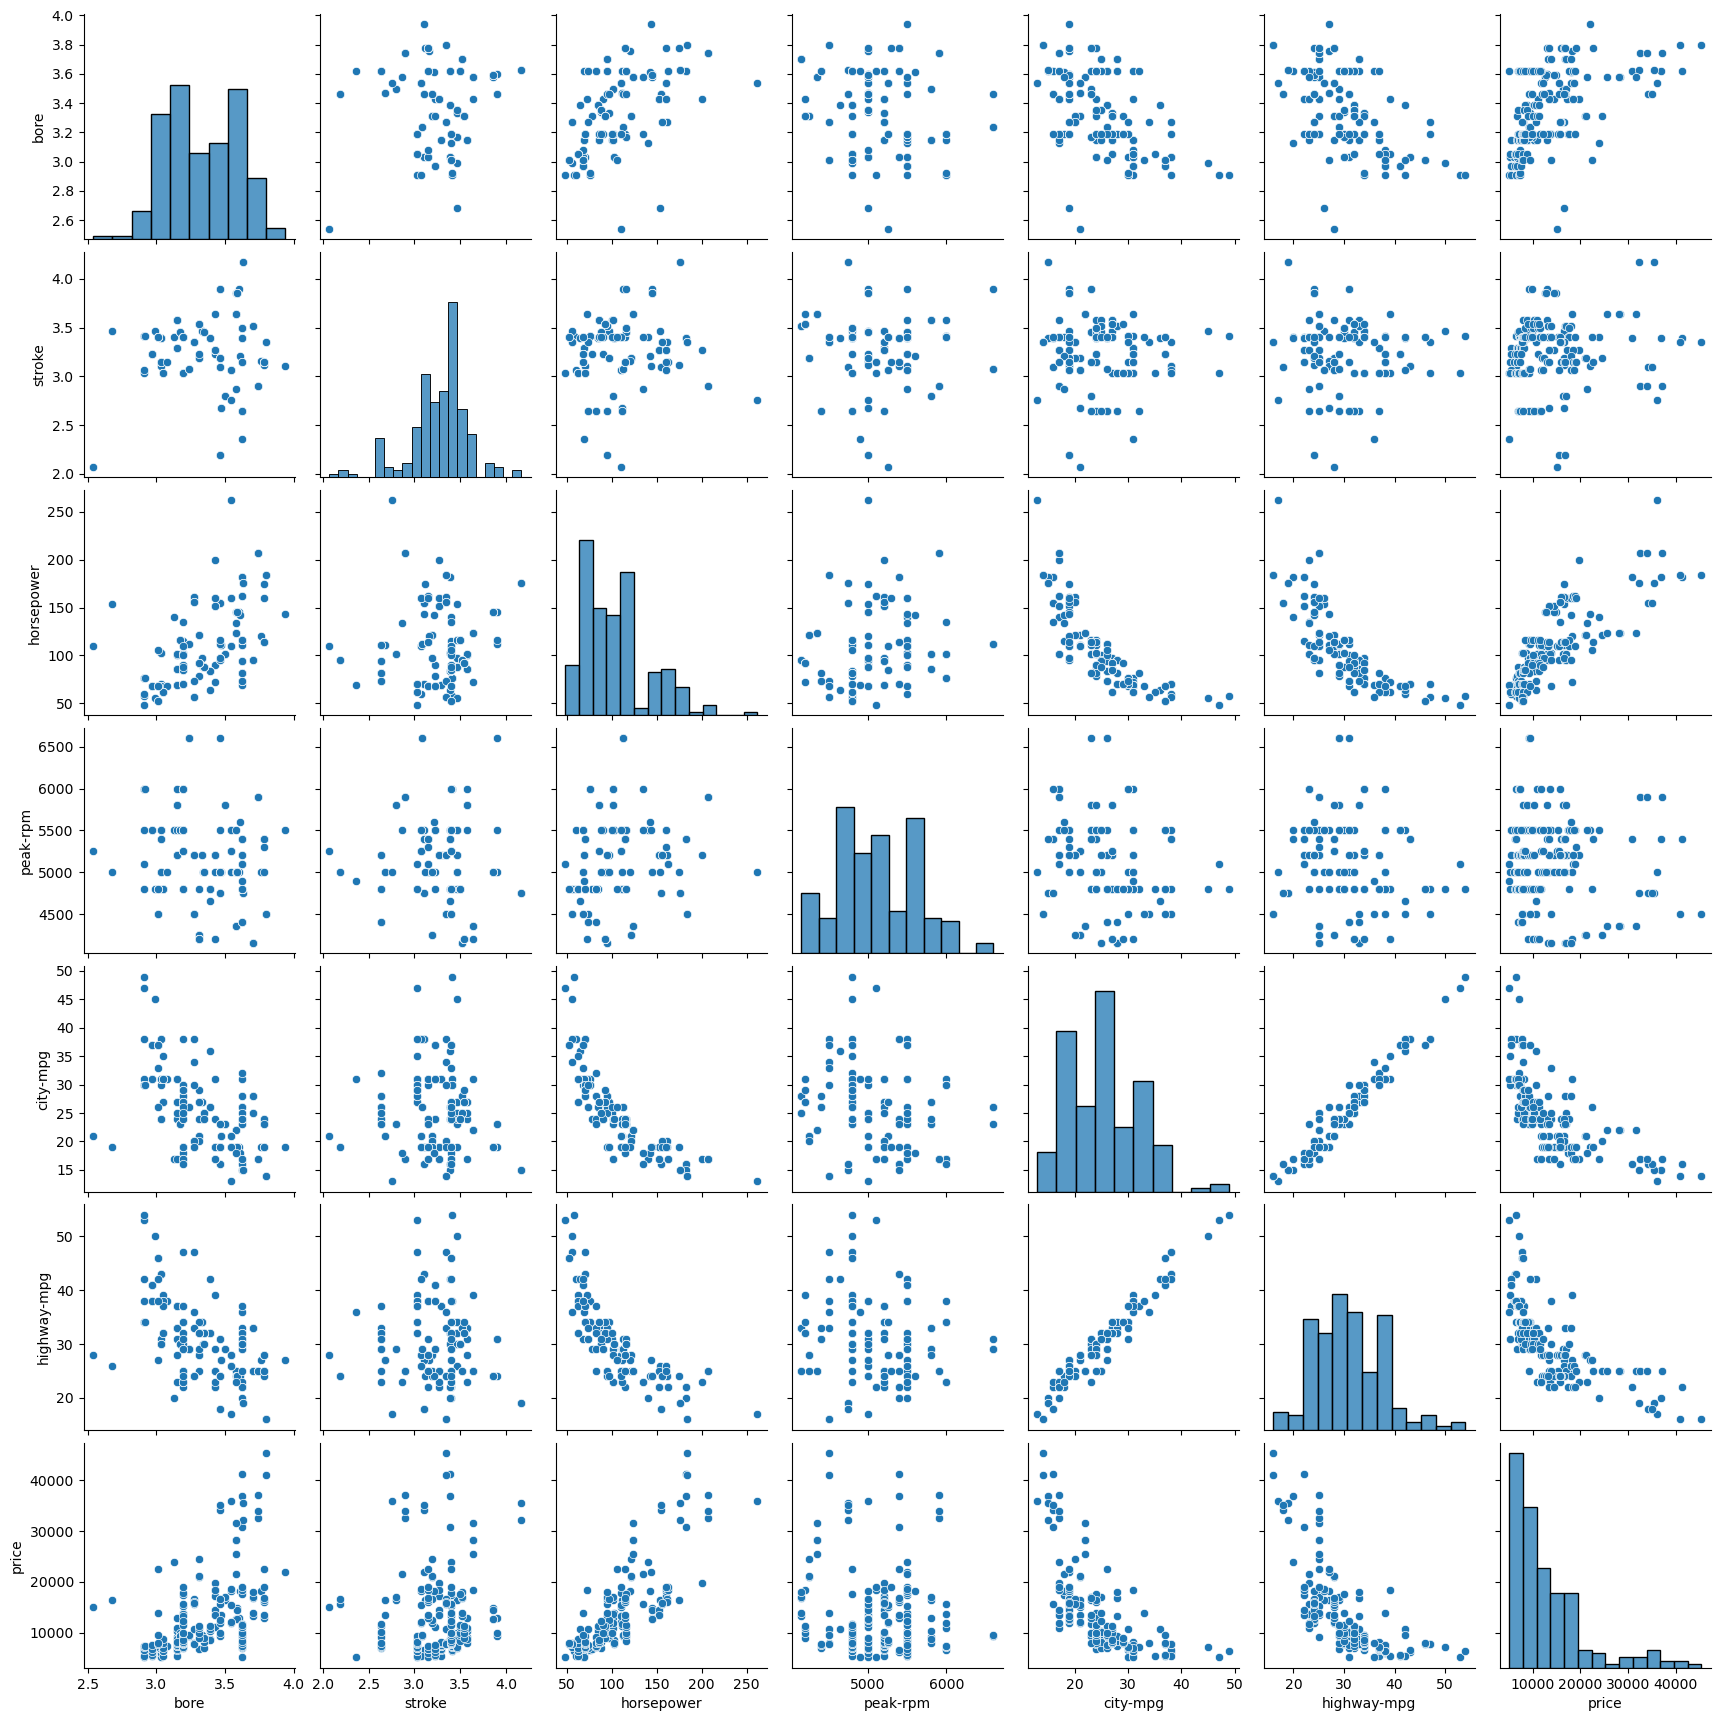

In [74]:
#pairplot based in enigne size attributes
df_num = df_delete[["bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]]
imputer = KNNImputer(n_neighbors=1)
df_num =pd.DataFrame(imputer.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
plt.figure(figsize=(20,20))
ax = sns.pairplot(df_num[["bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]],palette='blue') 

<AxesSubplot:>

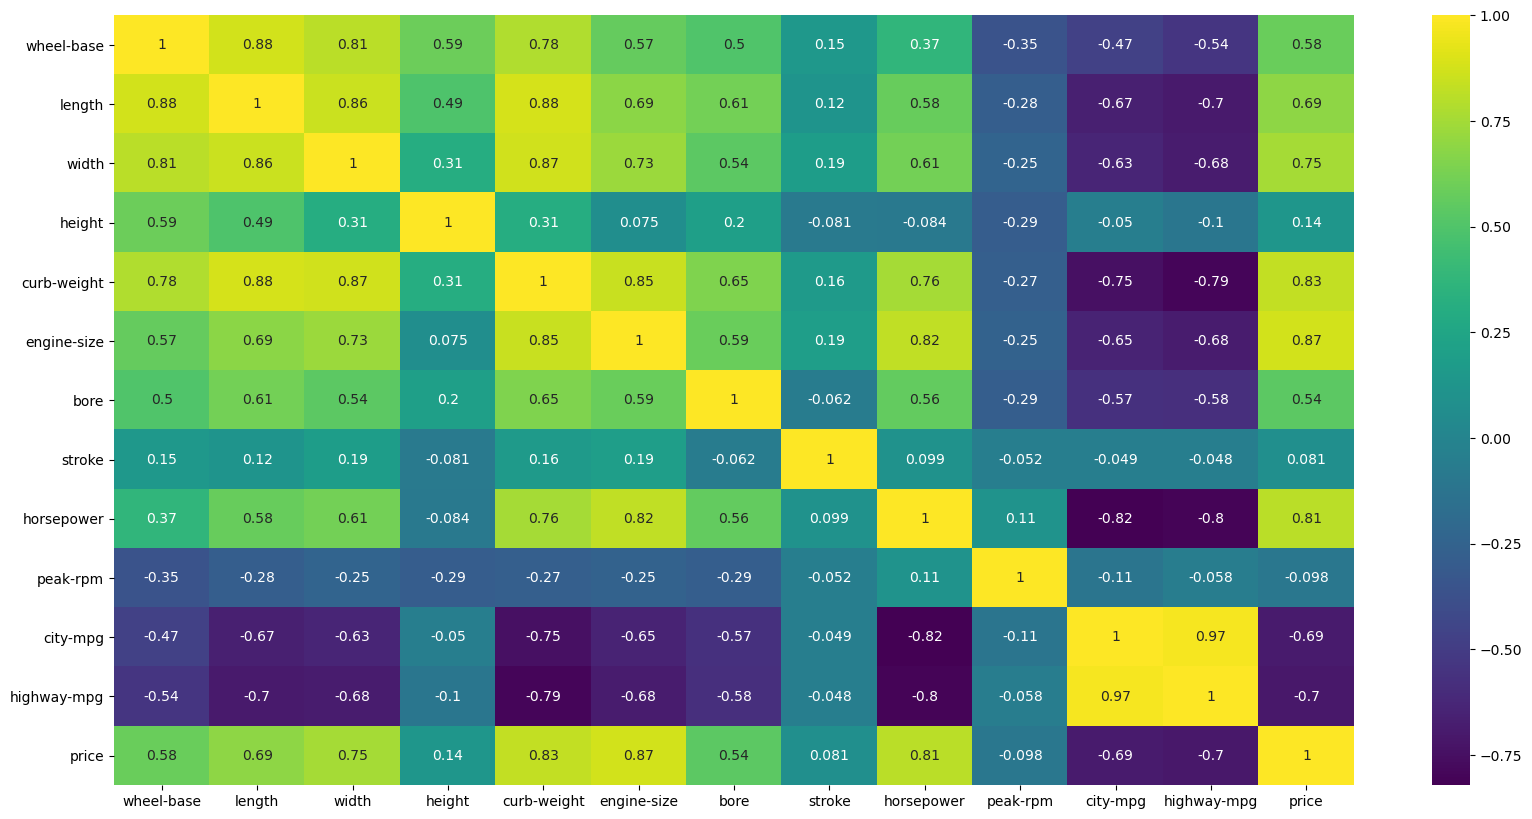

In [75]:
df_num = df_delete[["wheel-base", "length", "width", "height", "curb-weight", "engine-size","bore", "stroke", "horsepower","peak-rpm", "city-mpg", "highway-mpg","price"]]
imputer = KNNImputer(n_neighbors=1)
df_num =pd.DataFrame(imputer.fit_transform(df_num), index=df_num.index, columns=df_num.columns)
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True,cmap='viridis')

In [10]:
# Create dummy variables for all categorical data (including ordinal)
df = pd.get_dummies(df, columns=["make", "fuel-type", "num-of-doors","fuel-system", "aspiration",  "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders"  ], prefix=["make", "fuel_type", "doors", "fuel_sys", "aspi",  "body", "drive", "eng_loc", "eng_type", "cylinders"], drop_first= True)

df.head()

symboling normalized-losses  wheel-base  length  width  height  \
0          3               NaN        88.6   168.8   64.1    48.8   
1          3               NaN        88.6   168.8   64.1    48.8   
2          1               NaN        94.5   171.2   65.5    52.4   
3          2               164        99.8   176.6   66.2    54.3   
4          2               164        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  bore stroke  ...  eng_type_ohc eng_type_ohcf  \
0         2548          130  3.47   2.68  ...             0             0   
1         2548          130  3.47   2.68  ...             0             0   
2         2823          152  2.68   3.47  ...             0             0   
3         2337          109  3.19    3.4  ...             1             0   
4         2824          136  3.19    3.4  ...             1             0   

  eng_type_ohcv  eng_type_rotor  cylinders_3 cylinders_4  cylinders_5  \
0             0               0            0           1            0   
1             0               0            0           1            0   
2             1               0            0           0            0   
3             0               0            0           1            0   
4             0               0            0           0            1   

   cylinders_6  cylinders_8  cylinders_12  
0            0            0             0  
1            0            0             0  
2            1            0             0  
3            0            0             0  
4            0            0             0  

[5 rows x 66 columns]

In [11]:
#Split training dataset and test dataset
df, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [13]:
# Impute the missing values with KNN imputer (4 nearest neighbours)
df_imputed3NN = df
imputer = KNNImputer(n_neighbors=3)
df_imputed3NN =pd.DataFrame(imputer.fit_transform(df_imputed3NN), index=df.index, columns=df.columns)
print(df_imputed3NN)

     symboling  normalized-losses  wheel-base  length  width  height  \
66         0.0         132.666667       104.9   175.0   66.1    54.4   
111        0.0         161.000000       107.9   186.7   68.4    56.7   
153        0.0          77.000000        95.7   169.7   63.6    59.1   
96         1.0         122.000000        94.5   165.3   63.8    54.5   
38         0.0         106.000000        96.5   167.5   65.2    53.3   
..         ...                ...         ...     ...    ...     ...   
106        1.0         231.000000        99.2   178.5   67.9    49.7   
14         1.0         116.000000       103.5   189.0   66.9    55.7   
92         1.0         122.000000        94.5   165.3   63.8    54.5   
179        3.0         197.000000       102.9   183.5   67.7    52.0   
102        0.0         108.000000       100.4   184.6   66.5    56.1   

     curb-weight  engine-size  bore  stroke  ...  eng_type_ohc  eng_type_ohcf  \
66        2700.0        134.0  3.43    3.64  ...      

<AxesSubplot:>

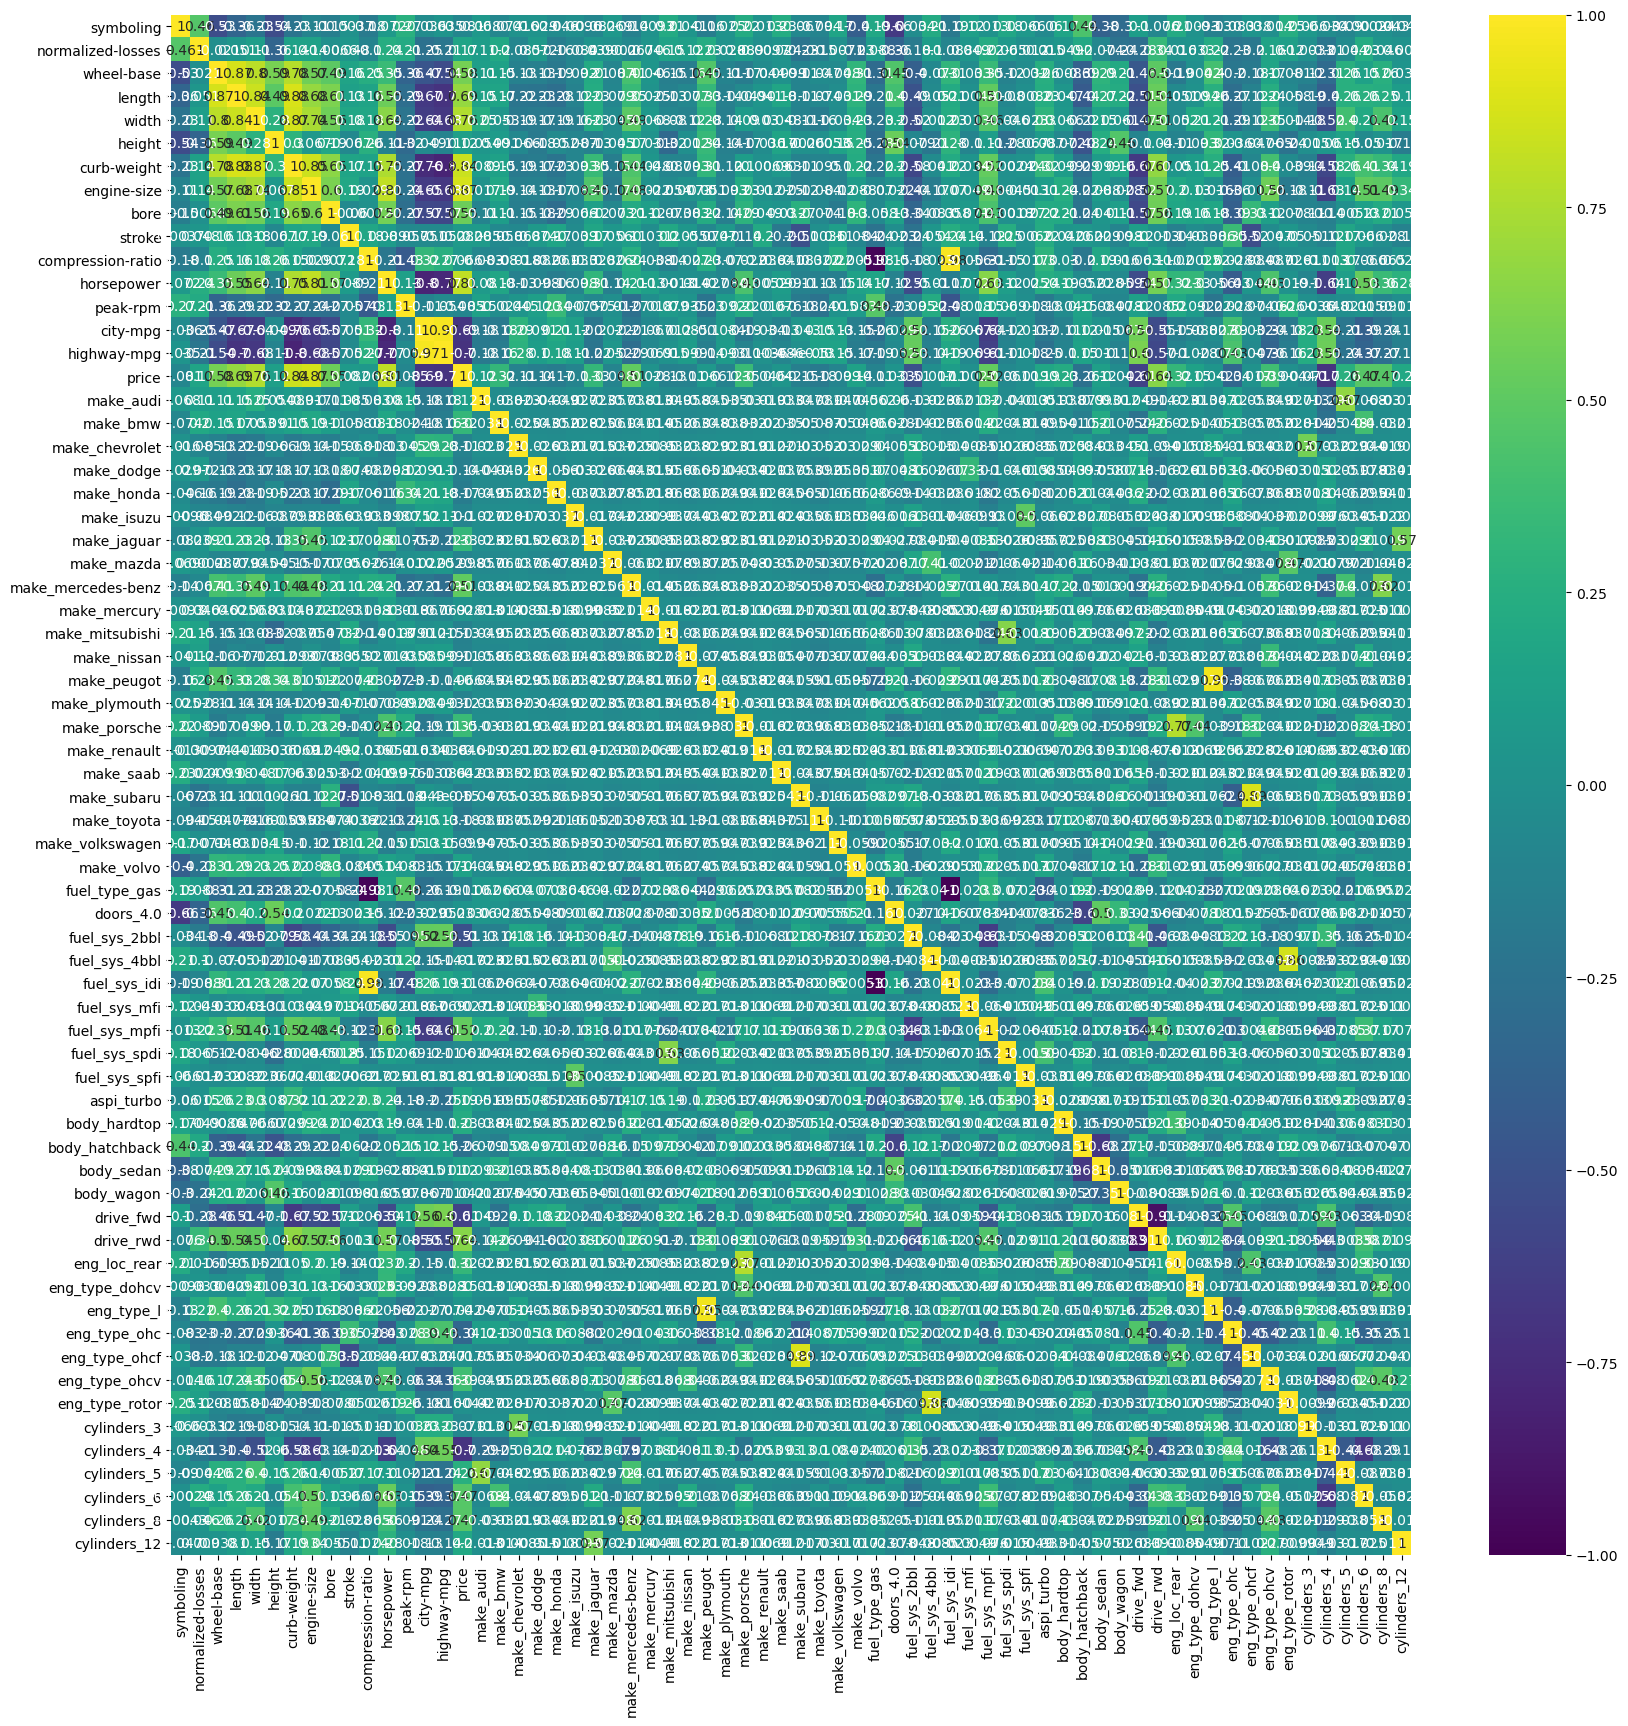

In [145]:
plt.figure(figsize=(20,20))
sns.heatmap(df_imputed3NN.corr(),annot=True,cmap='viridis')

In [12]:
list(df.columns.values)

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel_type_gas',
 'doors_4.0',
 'fuel_sys_2bbl',
 'fuel_sys_4bbl',
 'fuel_sys_idi',
 'fuel_sys_mfi',
 'fuel_sys_mpfi',
 'fuel_sys_spdi',
 'fuel_sys_spfi',
 'aspi_turbo',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_fwd',
 'drive_rwd',
 'eng_loc_rear',
 'eng_type_dohcv',
 'eng_type_l',
 'eng_type_ohc',
 'eng_type_ohcf',
 'eng_type_ohcv',
 'eng_type_rotor',
 'cylinders_3',
 'cylinders_4',
 'cylinde

# Pre-processing function

In [14]:
def preprocessing(dataframe_nr, df, train_index, test_index):
    if dataframe_nr == 1:
        df_train_imputed3NN = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=3)
        df_train_imputed3NN =pd.DataFrame(imputer.fit_transform(df_train_imputed3NN), index=train_index, columns=df.columns)
        df_imputed3NN = pd.DataFrame(imputer.fit_transform(df), index=df.index, columns=df.columns)
        df_imputed3NN_test = df_imputed3NN.iloc[test_index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed3NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed3NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        
    elif dataframe_nr==2:
    # delete rows with no price, and column normalized losses.
        df_delete= df 
        df_delete_train = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=3)
        df_delete_train =pd.DataFrame(imputer.fit_transform(df_delete_train), index=train_index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        
    elif dataframe_nr==3:
        df_delete = df
        num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
        for col in num_col:
            df_delete[col] = df_delete[col].replace('?', np.nan)
            df_delete[col] = pd.to_numeric(df_delete[col])
            df_delete_train= df_delete.iloc[train_index]
            df_delete[col].fillna(df_delete_train[col].median(), inplace=True)
            df_delete_train[col].fillna(df_delete_train[col].median(), inplace=True)
        
        imputer = KNNImputer(n_neighbors=1)
        df_delete_train = pd.DataFrame(imputer.fit_transform(df_delete_train), index=df_delete_train.index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
    
    elif dataframe_nr==4:
        df_delete = df
        num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
        for col in num_col:
            df_delete[col] = df_delete[col].replace('?', np.nan)
            df_delete[col] = pd.to_numeric(df_delete[col])
            df_delete_train= df_delete.iloc[train_index]
            df_delete[col].fillna(df_delete_train[col].mean(), inplace=True)
            df_delete_train[col].fillna(df_delete_train[col].mean(), inplace=True)
        
        imputer = KNNImputer(n_neighbors=1)
        df_delete_train = pd.DataFrame(imputer.fit_transform(df_delete_train), index=df_delete_train.index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])

    return X_train, y_train, X_test, y_test


# Find best pre-processed matrix based on standard settings

In [75]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

n_attr_leaf= 4
pruning= False
smoothing= False
optimized_model= False
incremental_fit = False
k=15
max_depth = 20
split_function="RMS"

#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])


#df = shuffle(df, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
lintree_MAE, lintree_r2, linear_tree_r2, linear_tree_MAE = [], [], [], []
#m5_matrix , const_matrix, const_sk_matrix, linear_matrix, random_matrix, extra_matrix = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


# We split the data and apply the pre-processing

for train_index, test_index in kf.split(df):
        dataframe_nr=1
        
        #pre-processing according to dataframe_nr
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)
        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing, n_attr_leaf= n_attr_leaf , max_depth=max_depth, k=k,pruning=pruning,optimize_models=optimized_model,incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf , max_depth=max_depth, smoothing=smoothing, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=n_attr_leaf , max_depth=max_depth, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth=max_depth, min_samples_split=n_attr_leaf , random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree
        extra_tree_regressor = ExtraTreeRegressor(max_depth=max_depth, min_samples_split= n_attr_leaf , random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))
        # linear tree (model tree from Gitbhub) 
        linear_tree_regressor = LinearTreeRegressor(max_depth=max_depth, min_samples_split= 6, base_estimator=LinearRegression()).fit(X_train, y_train)  # supports also multi-target and sample_weights
        linear_tree_r2.append(r2_score(y_test, linear_tree_regressor.predict(X_test)))
        linear_tree_MAE.append(mean_absolute_error(y_test, linear_tree_regressor.predict(X_test)))



m5_r2 = np.mean(M5regressor_r2_model)
cons_r2 = np.mean(const_regressor_r2)                                           
cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
linear_r2 = np.mean(linear_regressor_r2)
random_r2 =np.mean(random_forest_regressor_r2)
extra_r2= np.mean(extra_tree_r2)
lintree_r2= np.mean(linear_tree_r2)
m5_MAE = np.mean(M5regressor_MAE_model)
cons_MAE = np.mean(const_regressor_MAE)                                           
cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
linear_MAE = np.mean(linear_regressor_MAE)
random_MAE =np.mean(random_forest_regressor_MAE)
extra_MAE = np.mean(extra_tree_MAE)
lintree_MAE = np.mean(linear_tree_MAE)
print("m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)
print("linear tree", lintree_r2, "MAE", lintree_MAE)

m5_matrix= pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"])
const_matrix= pd.DataFrame([[cons_r2, cons_MAE]], columns= ["R2", "MAE"])
const_sk_matrix= pd.DataFrame([[cons_sklearn_r2,cons_sklearn_MAE]], columns= ["R2", "MAE"])
linear_matrix= pd.DataFrame([[linear_r2,linear_MAE]], columns= ["R2", "MAE"])
random_matrix= pd.DataFrame([[random_r2,random_MAE]], columns= ["R2", "MAE"])
extra_matrix= pd.DataFrame([[extra_r2, extra_MAE]], columns= ["R2", "MAE"]) 
lintree_matrix= pd.DataFrame([[lintree_r2, lintree_MAE]], columns= ["R2", "MAE"]) 

m5 r2 0.7042432049321755 MAE 2245.5514688296134
cons r2 0.762400074148094 MAE 2055.967116013072
cons_sklearn r2 0.8328590609863588 MAE 1845.9890362394958
linear r2 0.8271222266164389 MAE 1850.0511886049808
random r2 0.8821958113692482 MAE 1594.6988798250363
extra r2 0.7499492928339281 MAE 2403.9041462418304
linear tree -21.276872162064716 MAE 13786.198510015258


In [ ]:
#Create X and y for X no deletion of values, imputed with 4nn

models_name= ['M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree']
r2Score = [m5_r2, cons_r2, cons_sklearn_r2, lintree_r2, linear_r2, random_r2, extra_r2]
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE, lintree_MAE, linear_MAE,random_MAE,extra_MAE]

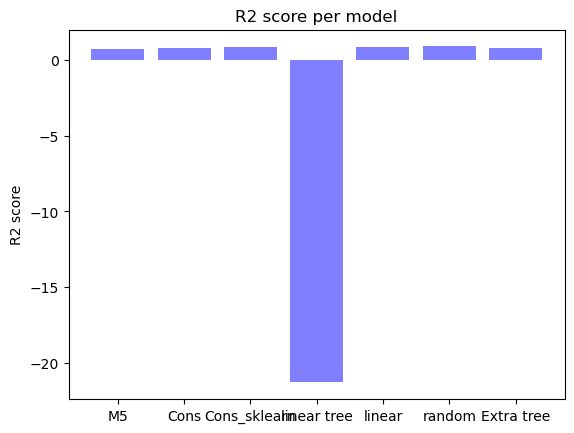

Text(0.5, 1.0, 'MAE score per model')

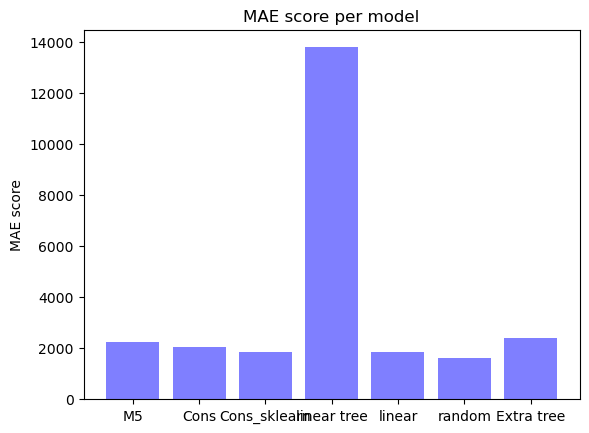

In [62]:
objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2, cons_r2, cons_sklearn_r2, lintree_r2, linear_r2, random_r2, extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE, lintree_MAE, linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('MAE score')
plt.title('MAE score per model')

2 m5 r2 -2.1751648326369235 MAE 3430.087845840212
2 cons r2 0.7630447728830528 MAE 1764.040379901961
2 cons_sklearn r2 0.7608964747988627 MAE 1759.4086484593838
2 linear r2 0.7658340736950964 MAE 1772.6792108933273
2 random r2 0.8537789067720594 MAE 1523.2608681656377
2 extra r2 0.7565161111325189 MAE 1880.780821078432
2 linear tree -7.146276601777203 MAE 7556.7711069302095


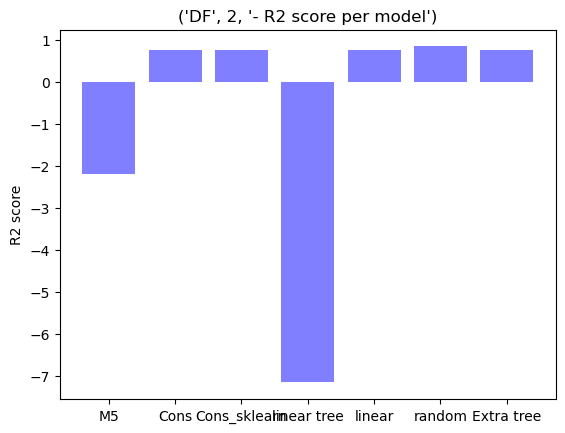

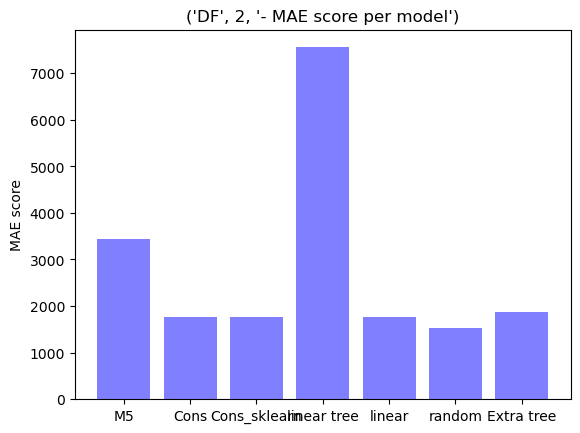

3 m5 r2 -9.692077701733792 MAE 4498.478566872562
3 cons r2 0.763924458606375 MAE 1772.3295955882354
3 cons_sklearn r2 0.763205915299044 MAE 1742.0116990546217
3 linear r2 0.7626486390244526 MAE 1776.6404535446902
3 random r2 0.8543820595907429 MAE 1518.881454510175
3 extra r2 0.7360009270055639 MAE 2005.4302696078435
3 linear tree -6.551357470129536e+17 MAE 348545724814.77405


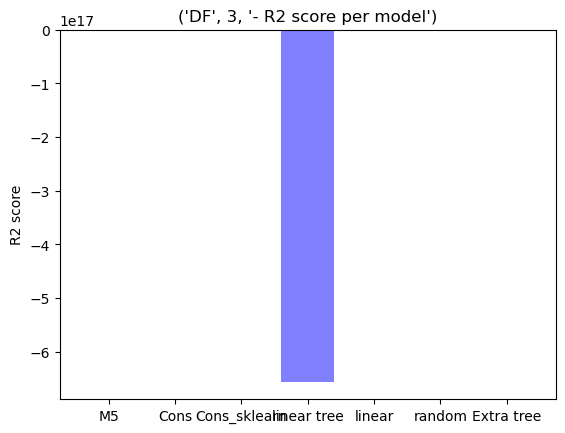

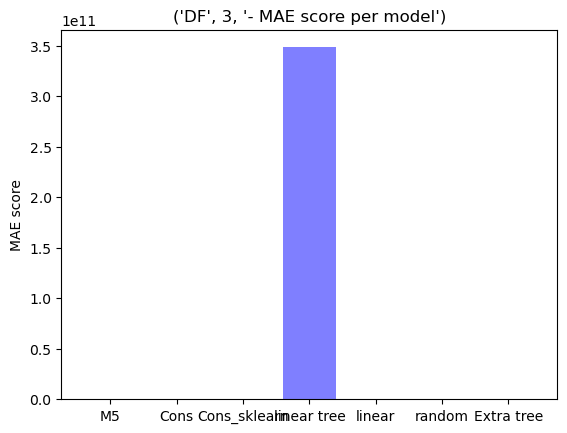

4 m5 r2 -9.692077701733792 MAE 4498.478566872562
4 cons r2 0.763924458606375 MAE 1772.3295955882354
4 cons_sklearn r2 0.763205915299044 MAE 1742.0116990546217
4 linear r2 0.7626486390244526 MAE 1776.6404535446902
4 random r2 0.8543820595907429 MAE 1518.881454510175
4 extra r2 0.7360009270055639 MAE 2005.4302696078435
4 linear tree -6.551357470129536e+17 MAE 348545724814.77405


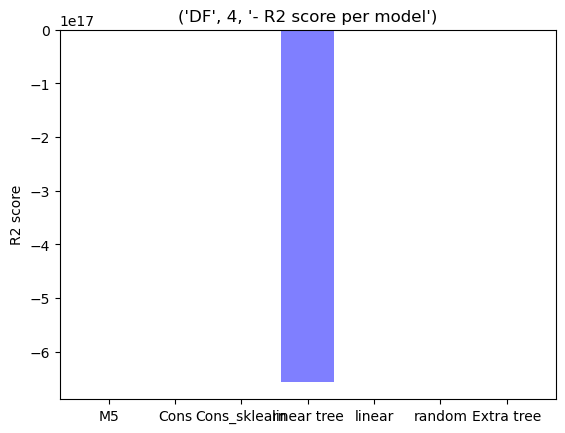

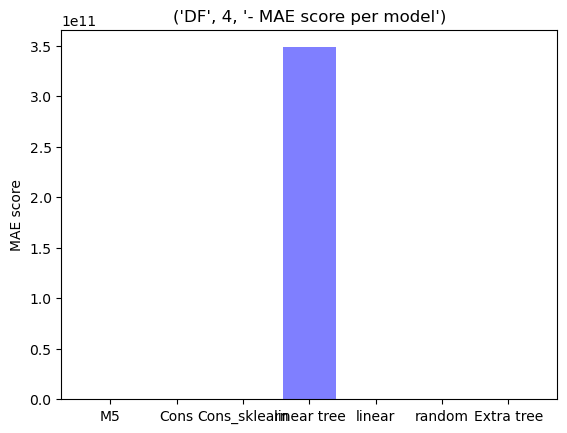

([<matplotlib.axis.XTick at 0x1c391762430>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

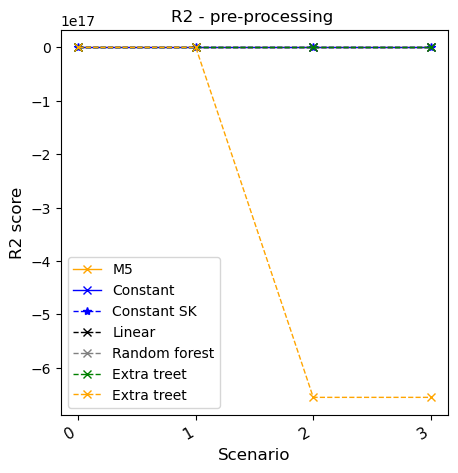

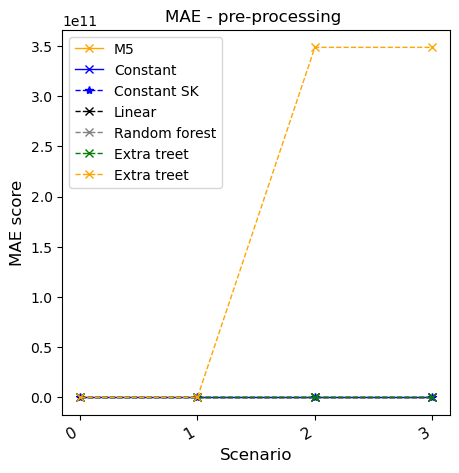

In [76]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

n_attr_leaf= 4
pruning= False
smoothing= False
optimized_model= False
incremental_fit = False
k=15
max_depth = 20
split_function="RMS"


#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])

# Pre-processing, normalized losses and delete the instances without a price. 
df_delete= df
df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]

df_delete=df_delete.drop(['normalized-losses'], axis=1)


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df_delete)
# We split the data and apply the pre-processing

for dataframe_nr in [2, 3 ,4]:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    lintree_MAE, lintree_r2, linear_tree_r2, linear_tree_MAE = [], [], [], [] 
    
    for train_index, test_index in kf.split(df_delete):
        
            #pre-processing according to dataframe_nr
            X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df_delete, train_index, test_index)

            #M5 regressor tree own
            reg = M5regressor(smoothing=smoothing, n_attr_leaf= n_attr_leaf , max_depth=max_depth, k=k,pruning=pruning,optimize_models=optimized_model,incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
            M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
            M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
            #Constant regressor tree own
            reg2 = Const_regressor(n_attr_leaf = n_attr_leaf , max_depth=max_depth, smoothing=smoothing, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
            const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
            const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
            #Constant regressor tree SKlearn
            const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=n_attr_leaf , max_depth=max_depth, random_state=42).fit(X_train, y_train)
            const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
            const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
            #Linear regression sklearn
            linear_regressor = LinearRegression().fit(X_train, y_train)
            linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
            linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
            # Random forrest regressor
            random_forest_regressor = RandomForestRegressor(max_depth=max_depth, min_samples_split=n_attr_leaf , random_state=42).fit(X_train, y_train)
            random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
            random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
            #Extra tree
            extra_tree_regressor = ExtraTreeRegressor(max_depth=max_depth, min_samples_split= n_attr_leaf , random_state=42).fit(X_train, y_train)
            extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
            extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))
            # linear tree (model tree from Gitbhub) 
            linear_tree_regressor = LinearTreeRegressor(max_depth=max_depth, min_samples_split= 6, base_estimator=LinearRegression()).fit(X_train, y_train)  # supports also multi-target and sample_weights
            linear_tree_r2.append(r2_score(y_test, linear_tree_regressor.predict(X_test)))
            linear_tree_MAE.append(mean_absolute_error(y_test, linear_tree_regressor.predict(X_test)))


    m5_r2 = np.mean(M5regressor_r2_model)
    cons_r2 = np.mean(const_regressor_r2)                                           
    cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
    linear_r2 = np.mean(linear_regressor_r2)
    random_r2 =np.mean(random_forest_regressor_r2)
    extra_r2= np.mean(extra_tree_r2)
    lintree_r2= np.mean(linear_tree_r2)
    m5_MAE = np.mean(M5regressor_MAE_model)
    cons_MAE = np.mean(const_regressor_MAE)                                           
    cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
    linear_MAE = np.mean(linear_regressor_MAE)
    random_MAE =np.mean(random_forest_regressor_MAE)
    extra_MAE = np.mean(extra_tree_MAE)
    lintree_MAE = np.mean(linear_tree_MAE)
    print(dataframe_nr, "m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
    print(dataframe_nr, "cons r2",cons_r2, "MAE", cons_MAE  )
    print(dataframe_nr, "cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
    print(dataframe_nr, "linear r2", linear_r2, "MAE", linear_MAE)
    print(dataframe_nr, "random r2", random_r2, "MAE", random_MAE)
    print(dataframe_nr, "extra r2", extra_r2, "MAE", extra_MAE)
    print(dataframe_nr, "linear tree", lintree_r2, "MAE", lintree_MAE)
     
        

    objects = models_name
    y_pos = np.arange(len(objects))
    r2Score = [m5_r2, cons_r2, cons_sklearn_r2, lintree_r2, linear_r2, random_r2, extra_r2]
    plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
    plt.xticks(y_pos, objects)
    plt.ylabel('R2 score')
    text= 'DF', dataframe_nr, '- R2 score per model'
    plt.title(text)
    plt.show()

    objects = models_name
    y_pos = np.arange(len(objects))
    MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE, lintree_MAE, linear_MAE,random_MAE,extra_MAE]
    plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
    plt.xticks(y_pos, objects)
    plt.ylabel('MAE score')
    text1 ='DF', dataframe_nr, '- MAE score per model'
    plt.title(text1)
    plt.show()
        
    m5_matrix = m5_matrix.append(pd.DataFrame([[m5_r2,m5_MAE]], columns= ["R2", "MAE"]))
    const_matrix = const_matrix.append(pd.DataFrame([[cons_r2, cons_MAE]], columns= ["R2", "MAE"]))
    const_sk_matrix = const_sk_matrix.append(pd.DataFrame([[cons_sklearn_r2,cons_sklearn_MAE]], columns= ["R2", "MAE"]))
    linear_matrix= linear_matrix.append(pd.DataFrame([[linear_r2,linear_MAE]], columns= ["R2", "MAE"]))
    random_matrix =random_matrix.append(pd.DataFrame([[random_r2,random_MAE]], columns= ["R2", "MAE"]))
    extra_matrix = extra_matrix.append(pd.DataFrame([[extra_r2, extra_MAE]], columns= ["R2", "MAE"])) 
    lintree_matrix= lintree_matrix.append(pd.DataFrame([[lintree_r2, lintree_MAE]], columns= ["R2", "MAE"]))
        
#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix.iloc[:,0] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix.iloc[:,0] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix.iloc[:,0], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix.iloc[:,0],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix.iloc[:,0],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix.iloc[:,0],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.plot(vals, lintree_matrix.iloc[:,0],"--",color="orange",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - pre-processing ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(4)
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(4)
plt.figure(figsize=(5,5))
plt.plot(vals, m5_matrix.iloc[:,1] , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, const_matrix.iloc[:,1] ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, const_sk_matrix.iloc[:,1], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_matrix.iloc[:,1],"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_matrix.iloc[:,1],"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_matrix.iloc[:,1],"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.plot(vals, lintree_matrix.iloc[:,1],"--",color="orange",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("MAE - pre-processing ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Scenario",fontsize=12)
labels =np.arange(4)
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

<function matplotlib.pyplot.show(close=None, block=None)>

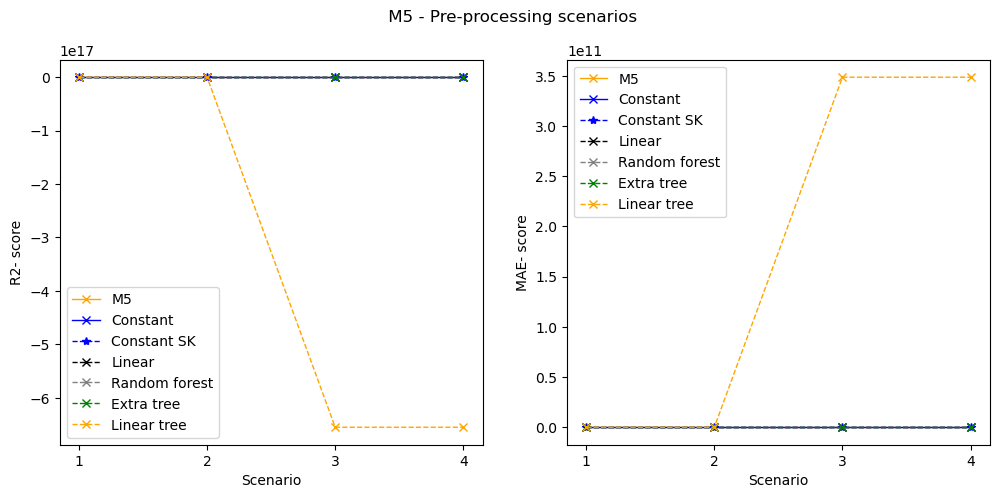

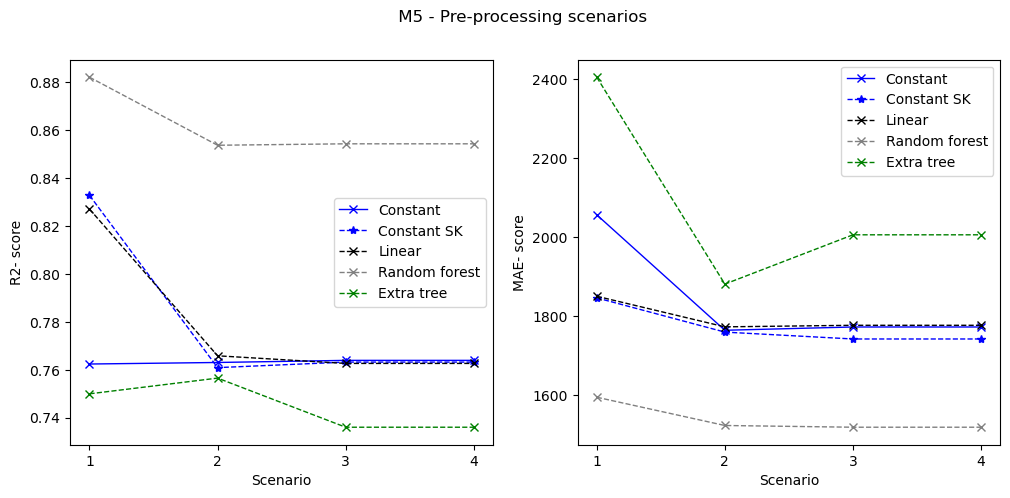

In [77]:
vals      = np.arange(4)

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_matrix.iloc[:,0] , color="orange",marker="x", linewidth=1,label="M5")
ax[0].plot(vals, const_matrix.iloc[:,0] ,color="blue",marker="x", linewidth=1,label="Constant")
ax[0].plot(vals, const_sk_matrix.iloc[:,0], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
ax[0].plot(vals, linear_matrix.iloc[:,0],"--",color="black",marker="x", linewidth=1,label="Linear")
ax[0].plot(vals, random_matrix.iloc[:,0],"--",color="grey",marker="x", linewidth=1,label="Random forest")
ax[0].plot(vals, extra_matrix.iloc[:,0],"--",color="green",marker="x", linewidth=1,label="Extra tree")
ax[0].plot(vals, lintree_matrix.iloc[:,0],"--",color="orange",marker="x", linewidth=1,label="Linear tree")
ax[1].plot(vals, m5_matrix.iloc[:,1] , color="orange",marker="x", linewidth=1,label="M5")
ax[1].plot(vals, const_matrix.iloc[:,1] ,color="blue",marker="x", linewidth=1,label="Constant")
ax[1].plot(vals, const_sk_matrix.iloc[:,1], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
ax[1].plot(vals, linear_matrix.iloc[:,1],"--",color="black",marker="x", linewidth=1,label="Linear")
ax[1].plot(vals, random_matrix.iloc[:,1],"--",color="grey",marker="x", linewidth=1,label="Random forest")
ax[1].plot(vals, extra_matrix.iloc[:,1],"--",color="green",marker="x", linewidth=1,label="Extra tree")
ax[1].plot(vals, lintree_matrix.iloc[:,1],"--",color="orange",marker="x", linewidth=1,label="Linear tree")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Scenario")
ax[1].set_xlabel("Scenario")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
labels = [1,2,3,4]
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Pre-processing scenarios",fontsize=12)
plt.savefig("../figures/automobile/Preprocessing.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
#ax[0].plot(vals, m5_matrix.iloc[:,0] , color="orange",marker="x", linewidth=1,label="M5")
ax[0].plot(vals, const_matrix.iloc[:,0] ,color="blue",marker="x", linewidth=1,label="Constant")
ax[0].plot(vals, const_sk_matrix.iloc[:,0], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
ax[0].plot(vals, linear_matrix.iloc[:,0],"--",color="black",marker="x", linewidth=1,label="Linear")
ax[0].plot(vals, random_matrix.iloc[:,0],"--",color="grey",marker="x", linewidth=1,label="Random forest")
ax[0].plot(vals, extra_matrix.iloc[:,0],"--",color="green",marker="x", linewidth=1,label="Extra tree")
#ax[0].plot(vals, lintree_matrix.iloc[:,0],"--",color="orange",marker="x", linewidth=1,label="Linear tree treet")
#ax[1].plot(vals, m5_matrix.iloc[:,1] , color="orange",marker="x", linewidth=1,label="M5")
ax[1].plot(vals, const_matrix.iloc[:,1] ,color="blue",marker="x", linewidth=1,label="Constant")
ax[1].plot(vals, const_sk_matrix.iloc[:,1], "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
ax[1].plot(vals, linear_matrix.iloc[:,1],"--",color="black",marker="x", linewidth=1,label="Linear")
ax[1].plot(vals, random_matrix.iloc[:,1],"--",color="grey",marker="x", linewidth=1,label="Random forest")
ax[1].plot(vals, extra_matrix.iloc[:,1],"--",color="green",marker="x", linewidth=1,label="Extra tree")
#ax[1].plot(vals, lintree_matrix.iloc[:,1],"--",color="orange",marker="x", linewidth=1,label="Linear treetreet")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Scenario")
ax[1].set_xlabel("Scenario")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
labels = [1,2,3,4]
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Pre-processing scenarios",fontsize=12)
plt.savefig("../figures/automobile/Preprocessing2.jpeg")
plt.show

In [67]:
print(m5_matrix)
print(const_matrix)
print(const_sk_matrix) 
print(linear_matrix)
print(random_matrix)
print(extra_matrix)
print(lintree_matrix)

         R2          MAE
0  0.704243  2245.551469
0 -2.175165  3430.087846
0 -9.692078  4498.478567
0 -9.692078  4498.478567
         R2          MAE
0  0.762400  2055.967116
0  0.763045  1764.040380
0  0.763924  1772.329596
0  0.763924  1772.329596
         R2          MAE
0  0.832859  1845.989036
0  0.760896  1759.408648
0  0.763206  1742.011699
0  0.763206  1742.011699
         R2          MAE
0  0.827122  1850.051189
0  0.765834  1772.679211
0  0.762649  1776.640454
0  0.762649  1776.640454
         R2          MAE
0  0.882196  1594.698880
0  0.853779  1523.260868
0  0.854382  1518.881455
0  0.854382  1518.881455
         R2          MAE
0  0.749949  2403.904146
0  0.756516  1880.780821
0  0.736001  2005.430270
0  0.736001  2005.430270
             R2           MAE
0 -2.127687e+01  1.378620e+04
0 -7.146277e+00  7.556771e+03
0 -6.551357e+17  3.485457e+11
0 -6.551357e+17  3.485457e+11


With the default settings, the first pre-processed matrix is clearly the best for the M5 model.
The constant regressor performs very stable, however the first matrix is the worst.

We will continue with the first pre-processed matrix


# Find the best settings for our algorithms

In [45]:
# loop through max depth range
import warnings
warnings.filterwarnings('ignore')

n_attr_leaf= 4
pruning= False
smoothing= False
optimized_model= False
incremental_fit = False
k=15
split_function="RMS"
#k_range =[5, 10, 15, 20, 25, 50, 100, 200 , 500]
max_depth_range=[2, 4, 5, 10, 15, 20,  25, 50, 100, 200]

#df = shuffle(df, random_state=42)
m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
linear_tree_r2, linear_tree_MAE = [], []
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []

for max_depth in max_depth_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(df)
    
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    # We split the data and apply the pre-processing

    for train_index, test_index in kf.split(df):

        dataframe_nr = 1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing, n_attr_leaf=n_attr_leaf, max_depth= max_depth,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf, max_depth=max_depth, smoothing=smoothing, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))

    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2)) 
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))  
    
    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train)) 

print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )

m5 r2 [-677.7229255677315, -15.841859314880006, -7.967289946338139, 0.7011302663805751, 0.7042432049321755, 0.7042432049321755, 0.7042432049321755, 0.7042432049321755, 0.7042432049321755, 0.7042432049321755] MAE [26726.22575083027, 8512.287875114771, 5805.115363241557, 2277.2221076911965, 2245.5514688296134, 2245.5514688296134, 2245.5514688296134, 2245.5514688296134, 2245.5514688296134, 2245.5514688296134]
cons r2 [0.7597004884160186, 0.7882794078721808, 0.7872616822634835, 0.7626153955746192, 0.762400074148094, 0.762400074148094, 0.762400074148094, 0.762400074148094, 0.762400074148094, 0.762400074148094] MAE [2369.2592623308883, 2080.6121191772286, 2015.875625543636, 2053.087000466853, 2055.967116013072, 2055.967116013072, 2055.967116013072, 2055.967116013072, 2055.967116013072, 2055.967116013072]
m5 r2 train [0.9988786438663244, 0.9996326991779814, 0.9996441349369611, 0.999683829525301, 0.999683829525301, 0.999683829525301, 0.999683829525301, 0.999683829525301, 0.999683829525301, 0.9

<function matplotlib.pyplot.show(close=None, block=None)>

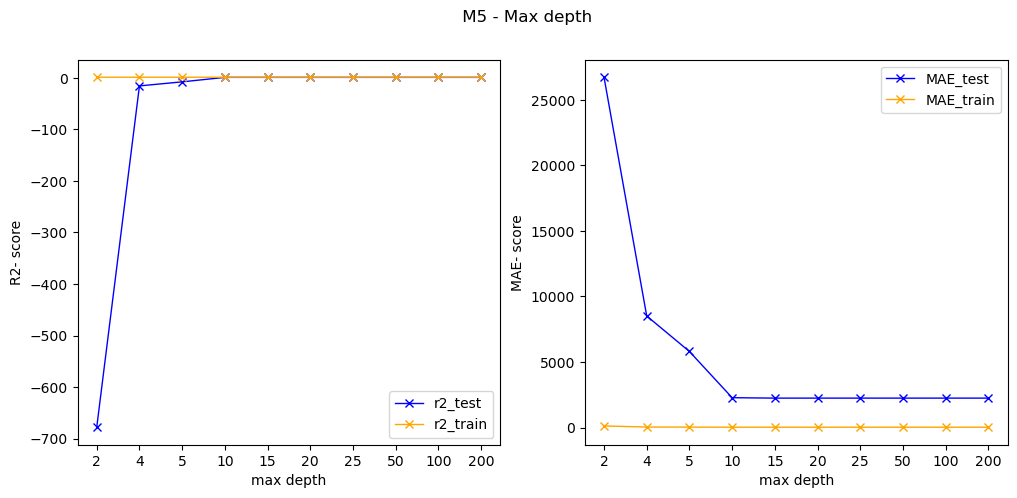

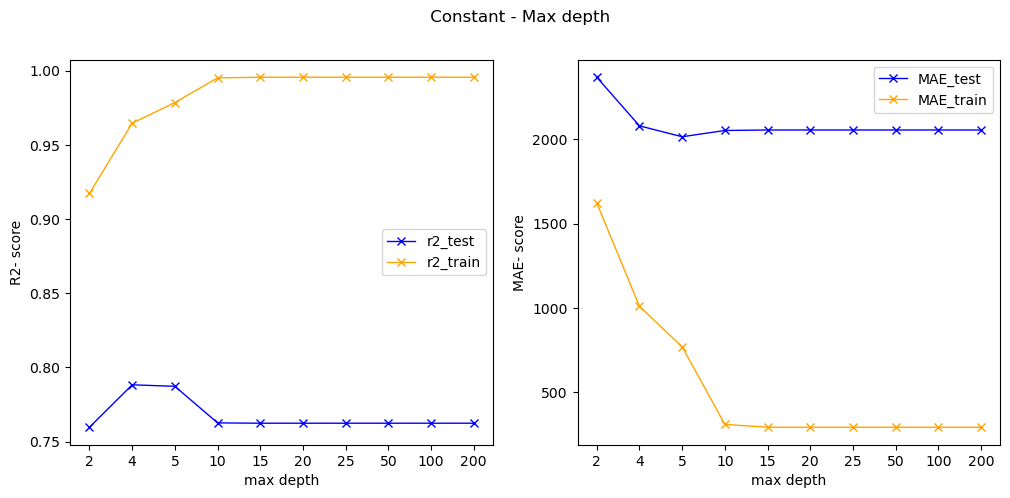

In [46]:
vals      = np.arange(len(max_depth_range))

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("max depth")
ax[1].set_xlabel("max depth")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
labels =max_depth_range
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Max depth ",fontsize=12)
plt.savefig("../figures/automobile/max_depth_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("max depth")
ax[1].set_xlabel("max depth")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
labels =max_depth_range
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant - Max depth ",fontsize=12)
plt.savefig("../figures/automobile/max_depth_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee465dac0>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '10'),
  Text(4, 0, '15'),
  Text(5, 0, '20'),
  Text(6, 0, '25'),
  Text(7, 0, '50'),
  Text(8, 0, '100'),
  Text(9, 0, '200')])

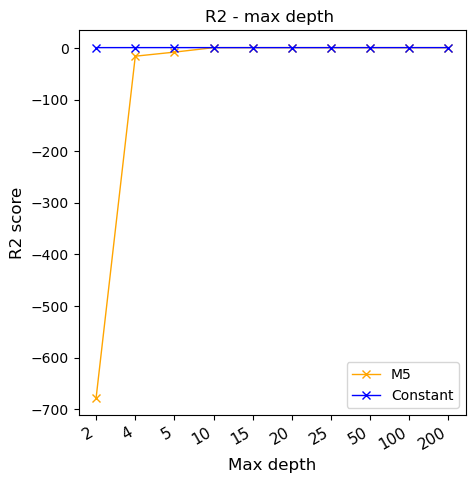

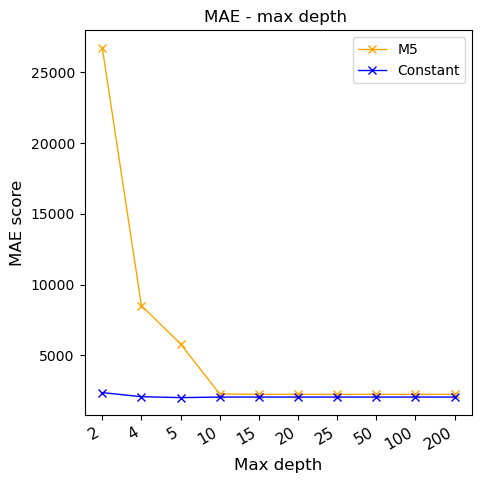

In [70]:
#Graph max_depth range
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - max depth ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph max_deoth range
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")

plt.legend(loc="best")
plt.title("MAE - max depth ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

The M5 model improves a lot increasing the maximum depth for the first steps, after amax depth of 15 it does not improve any further. 
The constant regressor first improves and then decreases again. 

maximum depth for x5 model is set to 15
maximum depth for constant regressor is set to 5


In [55]:
print(M5regressor_r2_model)

[-24.308371941211224, -3.3171663824291313, -0.6532149429356024, -6579.465258596964, -2.3987662098873686, -31.478424063773616, -133.2341280205941, -1.3999809700245942, -1.1935130295018226, 0.2195684800060691, -79.5500691292568, -0.5776566628321695, -1.8061946033551997, -55.31360710373145, -4.786351037704209, 0.8502365070938572, -1.7373979999715234, -3.3023748861947597, -5.396116266201748, -6.799061966646053, -11.085731138425409, -0.12131553782583104, -0.10495774077846964, -65.35662425834661, -6.198340546682568, 0.8716841567901472, 0.5011919433400924, 0.2161705430628127, 0.958692226064218, 0.6463308894202481, 0.7524629484635595, 0.8012301296762797, 0.8415539974538409, 0.7550157009523706, 0.6620260492367596, 0.692041241169691, 0.6387955706544731, 0.2792916500639975, 0.9548307121369003, 0.634054663997879, 0.7524629484635595, 0.8014854630894602, 0.8415539974538409, 0.7532667614233693, 0.6620761925946883, 0.692041241169691, 0.6386939367288078, 0.2792916500639975, 0.9580144011040145, 0.663545

In [78]:
# loop through n_attr_leaf_range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15

#n_attr_leaf= 4
pruning= False
smoothing= False
optimized_model= False
incremental_fit = False
k=15
split_function="RMS"
#k_range =[5, 10, 15, 20, 25, 50, 100, 200 , 500]


n_attr_leaf_range=[4, 6, 8, 10, 20, 50, 100]


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2= [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []


for n_attr_leaf in n_attr_leaf_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing, n_attr_leaf=n_attr_leaf, max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf, max_depth=max_depth_cons, smoothing=smoothing, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))

    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))
    
    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))

print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )

m5 r2 [0.7042432049321755, -4.943216245308653, -6.218956664396594, -12.857113074966392, -6.461822095435681, -1018.7337005344325, -3.0652114348443686] MAE [2245.5514688296134, 3876.3780179981345, 4633.341478479355, 5415.433233983471, 5411.174028637492, 32914.46232075304, 5163.292673183673]
cons r2 [0.7872616822634835, 0.7866055572566973, 0.780036902543643, 0.7829981137523785, 0.8379973907885712, 0.8245134400698436, 0.7670388680300818] MAE [2015.875625543636, 2005.922108386773, 2057.9973884988185, 2012.4861337816533, 1873.7398795302665, 2028.5750658311722, 2453.686114957794]
m5 r2 train [0.999683829525301, 0.9996824053747554, 0.9996772528174072, 0.9996714474689716, 0.9996455414135467, 0.998578753078457, 0.9961805913441145] MAE train [25.0452748667253, 25.431252645921273, 26.40479820923985, 27.87442526336155, 34.878407984560766, 133.44380176050842, 322.84465905327795]
cons r2 train [0.9784417194852202, 0.9753747310366899, 0.9704027669492368, 0.9639972937151293, 0.9358383464735128, 0.88939

<function matplotlib.pyplot.show(close=None, block=None)>

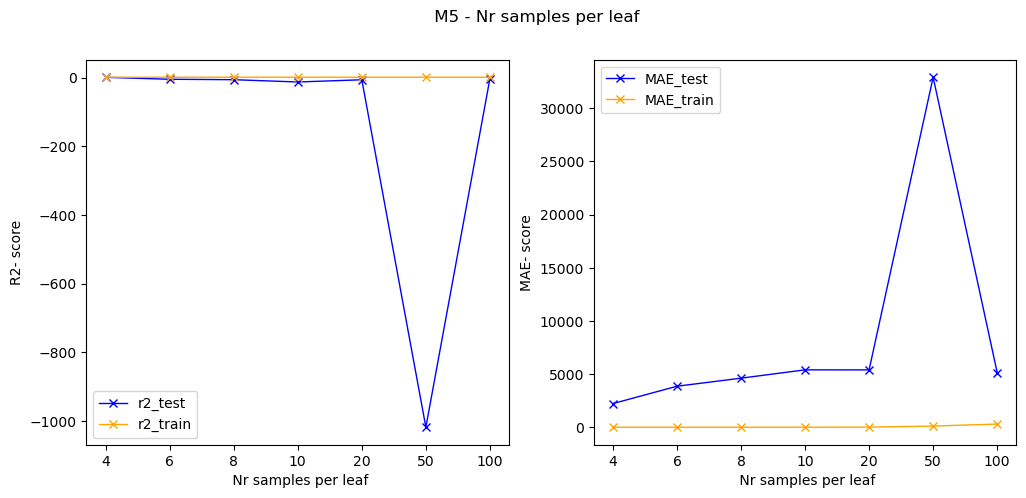

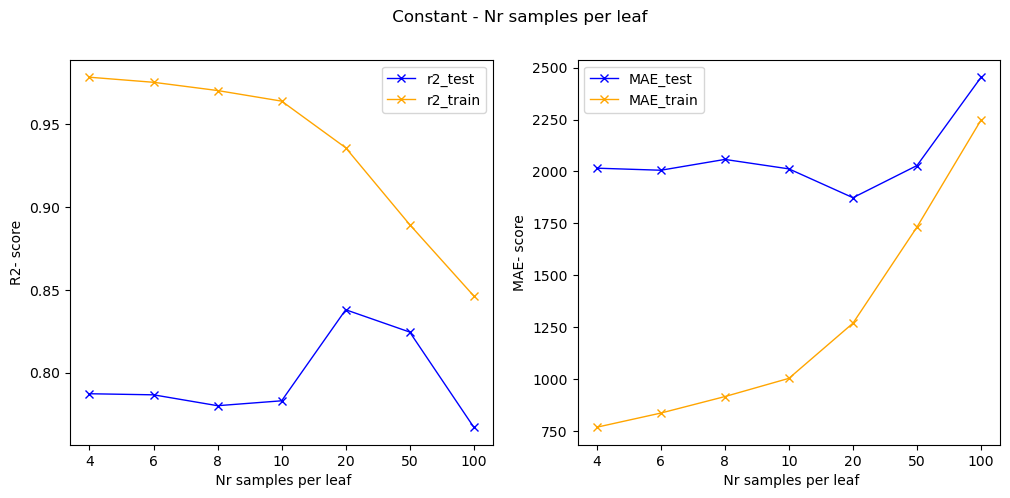

In [79]:
vals      = np.arange(len(n_attr_leaf_range))
labels =n_attr_leaf_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(" Nr samples per leaf")
ax[1].set_xlabel(" Nr samples per leaf")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Nr samples per leaf ",fontsize=12)
plt.savefig("../figures/automobile/Nr_samples_per_leaf__m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(" Nr samples per leaf")
ax[1].set_xlabel(" Nr samples per leaf")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant - Nr samples per leaf ",fontsize=12)
plt.savefig("../figures/automobile/Nr_samples_per_leaf_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee48804f0>,
 [Text(0, 0, '4'),
  Text(1, 0, '6'),
  Text(2, 0, '8'),
  Text(3, 0, '10'),
  Text(4, 0, '20'),
  Text(5, 0, '50'),
  Text(6, 0, '100')])

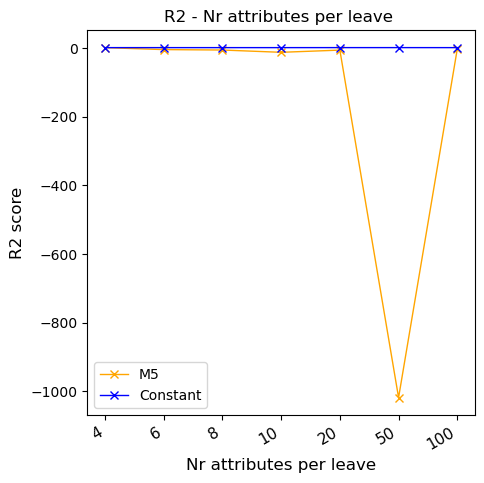

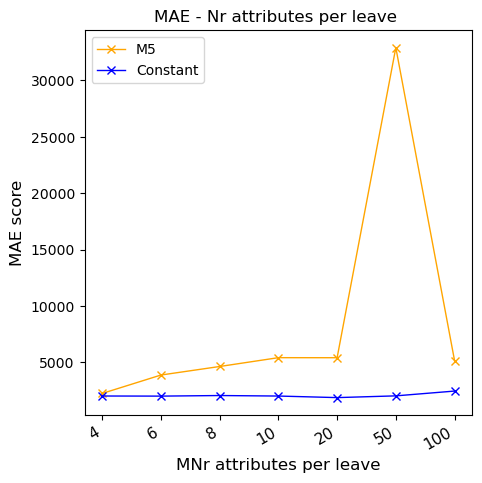

In [72]:
#Graph Nr attributes per leave range
vals      = np.arange(len(n_attr_leaf_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - Nr attributes per leave ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Nr attributes per leave",fontsize=12)
labels =n_attr_leaf_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(n_attr_leaf_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")

plt.legend(loc="best")
plt.title("MAE - Nr attributes per leave ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Nr attributes per leave",fontsize=12)
labels =n_attr_leaf_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

The constant model performs best with 20 attributes per leaf. The m5 models performs best with 4 attributes per leave.
There is one strange extreme minimum for the M5 model with 50 samples per leave. 


In [49]:
# Smooting on, and loop through k range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_depth  = 4

pruning= False
smoothing= True
optimized_model= False
incremental_fit = False
#k=15
split_function="RMS"
k_range =[5, 10, 15, 20, 25, 50, 100, 200 , 500]


#n_attr_leaf_range=[4, 6, 8, 10, 20, 50, 100]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []

for k in k_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing, n_attr_leaf=n_attr_leaf_depth , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))


    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))   
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))                                           

    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))
    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )


m5 r2 [-44.00799075871071, -66.77251331493859, -66.2973758925275, -58.09555186727714, -48.54140853420734, -17.385372615909766, -2.351437504683447, 0.6487786829611053, 0.8631319461065944] MAE [11187.995336603333, 13002.90066032907, 12709.826598563994, 11790.116014898826, 10753.295486785548, 6689.806980577172, 3405.639471821481, 1997.4844972619267, 1714.6175530347834]
cons r2 [0.7871902087970378, 0.7072699477932766, 0.6364340091803243, 0.5761028764228713, 0.52446206300695, 0.3479578073234526, 0.17653467827170652, 0.045046073253079424, -0.05337497072117649] MAE [2245.986891330137, 2647.7945341559634, 2980.49745176749, 3244.3555668242802, 3463.7824983798396, 4164.6254500891055, 4805.454947561282, 5267.64309812253, 5591.686729433974]
m5 r2 train [0.9988768254985599, 0.9976380867525114, 0.9964148040364659, 0.9952831639131631, 0.9942540605172396, 0.9903804206301222, 0.9861893887381082, 0.982676130673191, 0.979712975776368] MAE train [158.997263678704, 247.9301350843929, 315.2710875982164, 368

<function matplotlib.pyplot.show(close=None, block=None)>

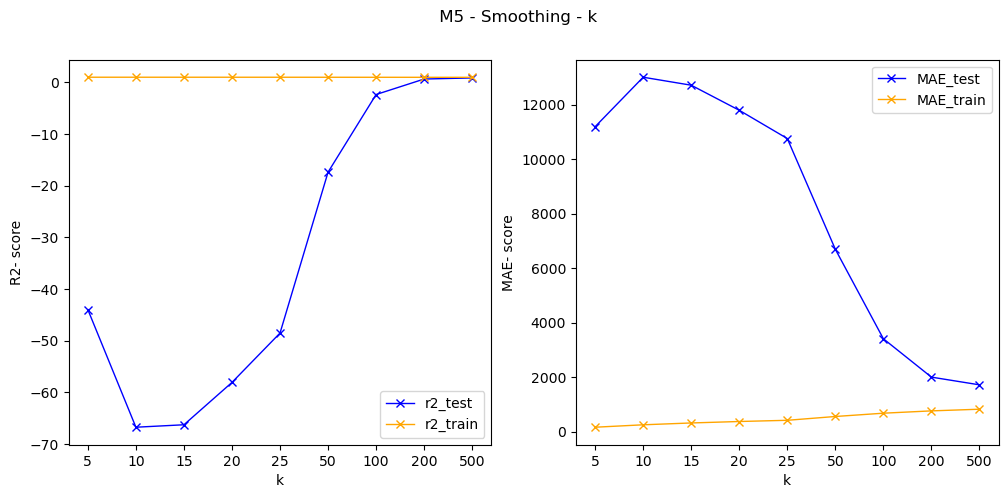

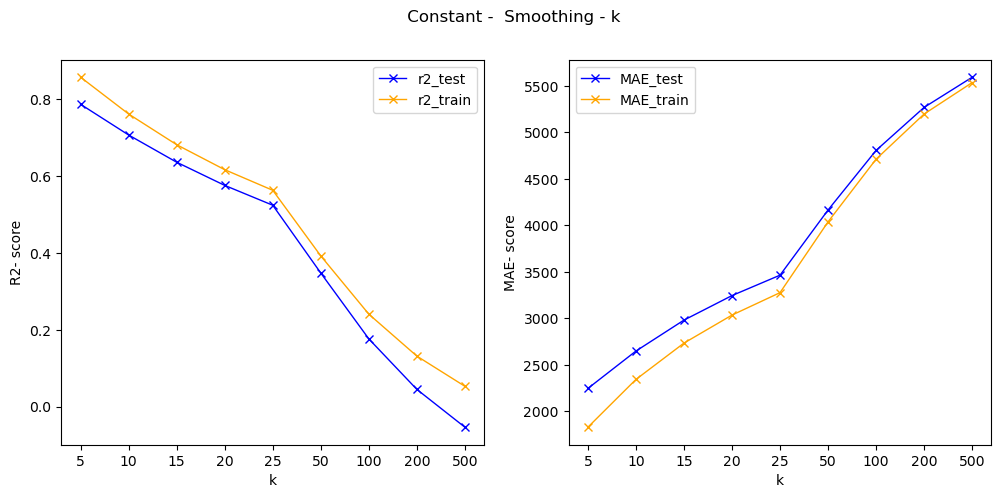

In [50]:
vals      = np.arange(len(k_range))
labels =k_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("k")
ax[1].set_xlabel("k")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Smoothing - k ",fontsize=12)
plt.savefig("../figures/automobile/Smoothing_k_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("k")
ax[1].set_xlabel("k")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant -  Smoothing - k",fontsize=12)
plt.savefig("../figures/automobile/Smoothing_k_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee4b7bc70>,
 [Text(0, 0, '5'),
  Text(1, 0, '10'),
  Text(2, 0, '15'),
  Text(3, 0, '20'),
  Text(4, 0, '25'),
  Text(5, 0, '50'),
  Text(6, 0, '100'),
  Text(7, 0, '200'),
  Text(8, 0, '500')])

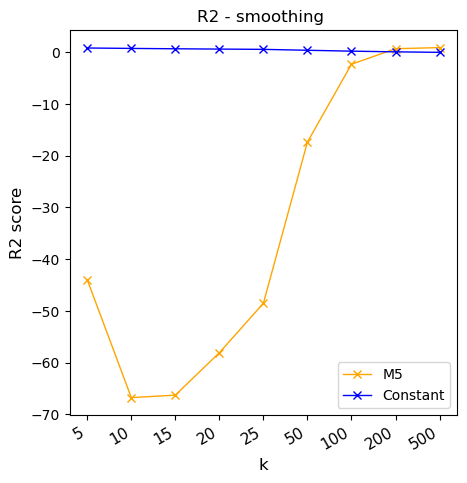

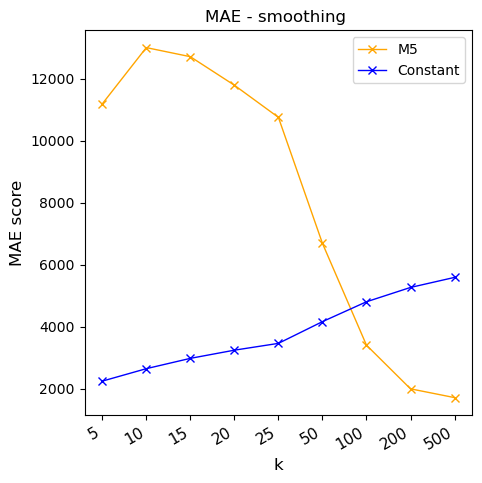

In [82]:
#Graph Nr attributes per leave range
vals      = np.arange(len(k_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - smoothing ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("k",fontsize=12)
labels =k_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(k_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")

plt.legend(loc="best")
plt.title("MAE - smoothing ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("k",fontsize=12)
labels =k_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

Smoothing makes the model worse for the constant regressor, but the M5 model initially performs worse, but the higher k becomes the better the M5 models scores.

We set smoothing on for the M5 model with a k of 500. For the constant regressor the smoothing is turned of. 

In [51]:
#Pruning

import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4

#pruning= True
smoothing_m5= True
smoothing_cons = False

optimized_model= False
incremental_fit = False
#k=15
split_function="RMS"
k =500
pruning_range=[False, True]


#n_attr_leaf_range=[4, 6, 8, 10, 20, 50, 100]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []

for pruning in pruning_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))



    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))   
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))    
    
    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))


print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )


m5 r2 [0.8631319461065944, 0.8631319452344124] MAE [1714.6175530347834, 1714.6175662058388]
cons r2 [0.8379973907885712, 0.8379973907885712] MAE [1873.7398795302665, 1873.7398795302665]
m5 r2 train [0.979712975776368, 0.979712975776368] MAE train [819.9514617509834, 819.9514617509834]
cons r2 train [0.9358383464735128, 0.9358383464735128] MAE train [1269.6387354639016, 1269.6387354639016]


<function matplotlib.pyplot.show(close=None, block=None)>

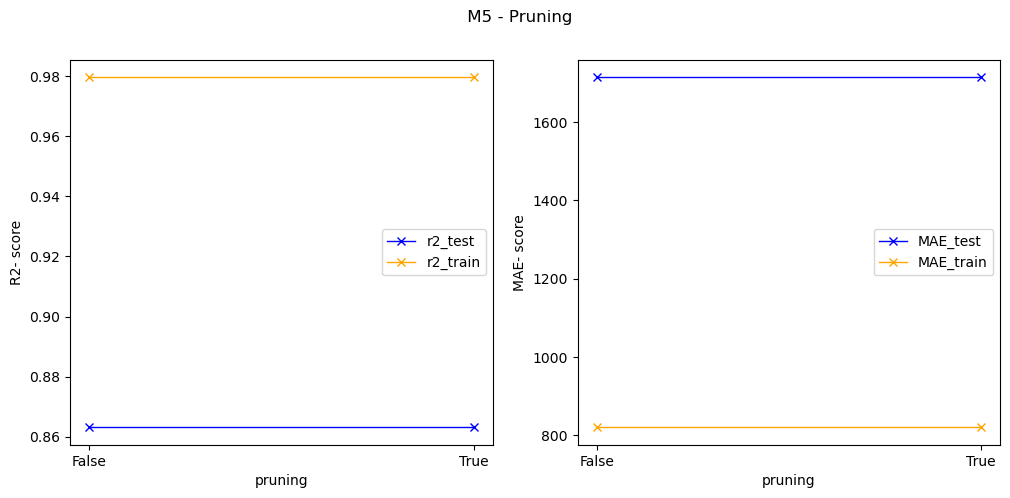

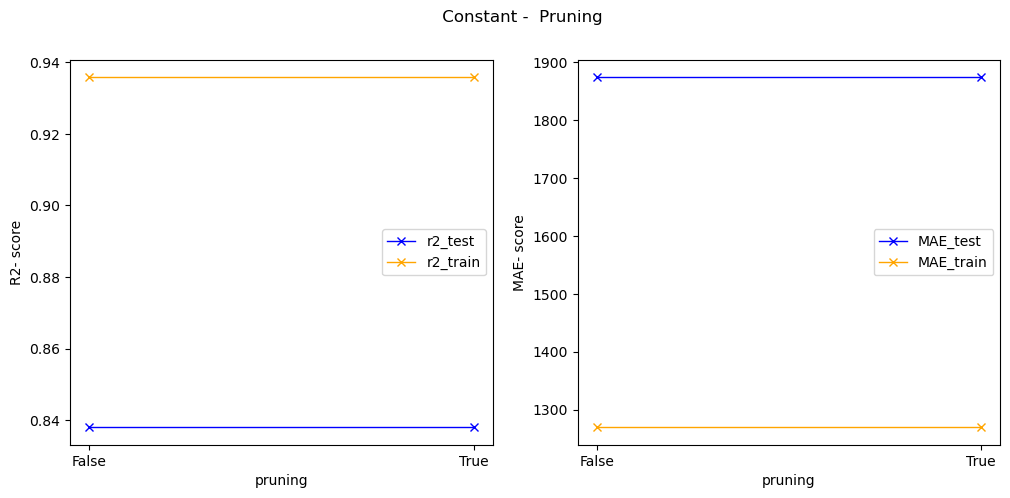

In [52]:
vals      = np.arange(len(pruning_range))
labels =pruning_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("pruning")
ax[1].set_xlabel("pruning")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Pruning ",fontsize=12)
plt.savefig("../figures/automobile/Pruning_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("pruning")
ax[1].set_xlabel("pruning")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant -  Pruning",fontsize=12)
plt.savefig("../figures/automobile/Pruning_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee5b97250>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

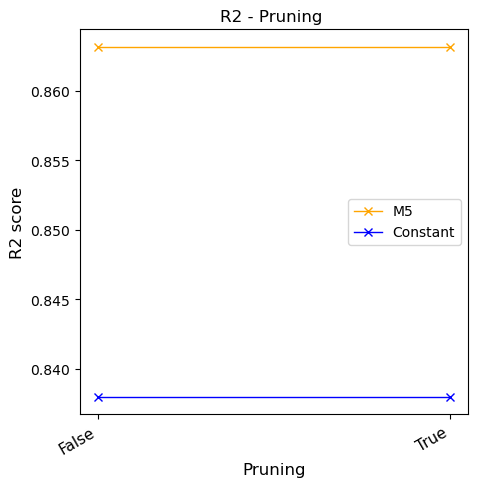

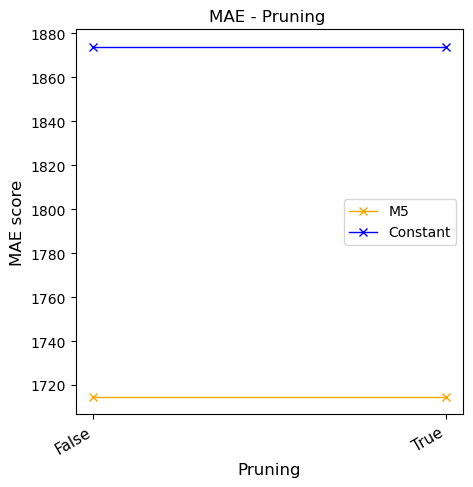

In [87]:
#Graph Nr attributes per leave range
vals      = np.arange(len(pruning_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - Pruning ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Pruning",fontsize=12)
labels =pruning_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(pruning_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")

plt.legend(loc="best")
plt.title("MAE - Pruning ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Pruning",fontsize=12)
labels =pruning_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

Both models have exactly the same results with and without pruning. 
Pruning will be turned off. 

In [80]:
#Optimize model
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4
k =500
pruning= True
#pruning= True
smoothing_m5= True
smoothing_cons = False

#optimized_model= False
optimized_model_range= [True, False]
incremental_fit = False
split_function="RMS"



#n_attr_leaf_range=[4, 6, 8, 10, 20, 50, 100]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []

for optimized_mode in optimized_model_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))




    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))   
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))                                           

    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))
    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )

m5 r2 [0.8631319452344124, 0.8631319452344124] MAE [1714.6175662058388, 1714.6175662058388]
cons r2 [0.8379973907885712, 0.8379973907885712] MAE [1873.7398795302665, 1873.7398795302665]
m5 r2 train [0.979712975776368, 0.979712975776368] MAE train [819.9514617509834, 819.9514617509834]
cons r2 train [0.9358383464735128, 0.9358383464735128] MAE train [1269.6387354639016, 1269.6387354639016]


<function matplotlib.pyplot.show(close=None, block=None)>

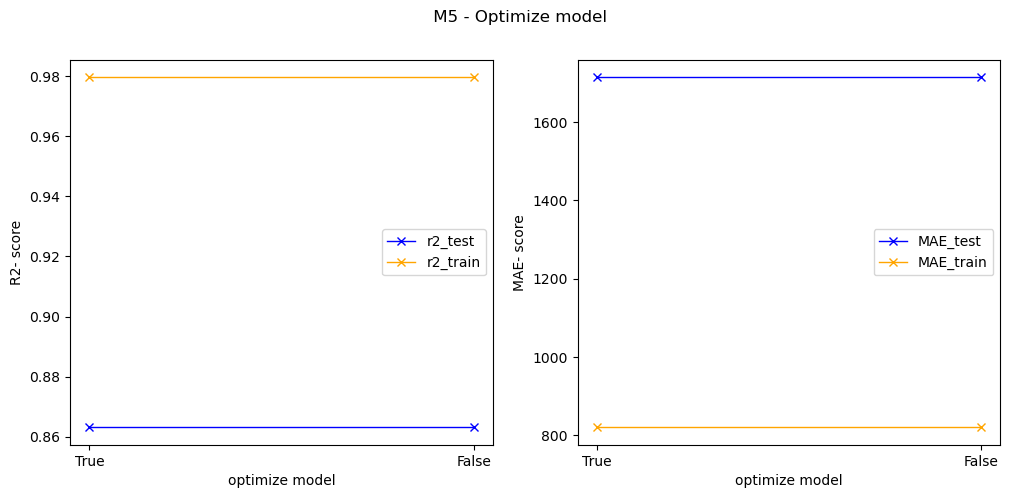

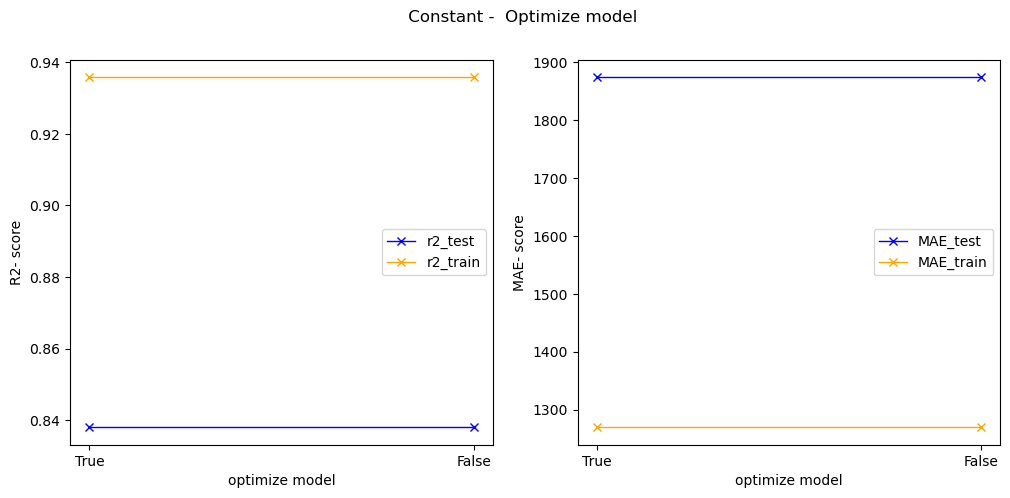

In [81]:
vals      = np.arange(len(optimized_model_range))
labels =optimized_model_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("optimize model")
ax[1].set_xlabel("optimize model")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Optimize model ",fontsize=12)
plt.savefig("../figures/automobile/Optimize_model_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("optimize model")
ax[1].set_xlabel("optimize model")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant -  Optimize model",fontsize=12)
plt.savefig("../figures/automobile/Optimize_model_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee4573670>,
 [Text(0, 0, 'True'), Text(1, 0, 'False')])

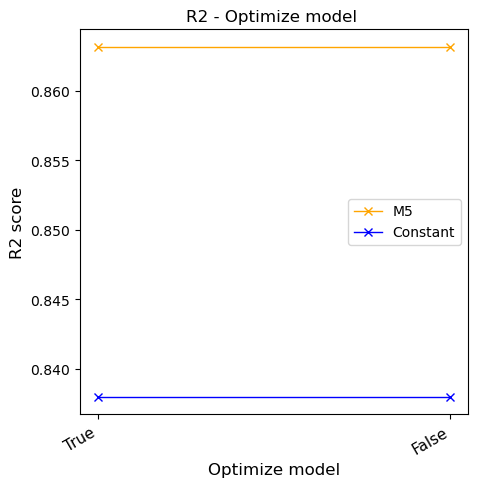

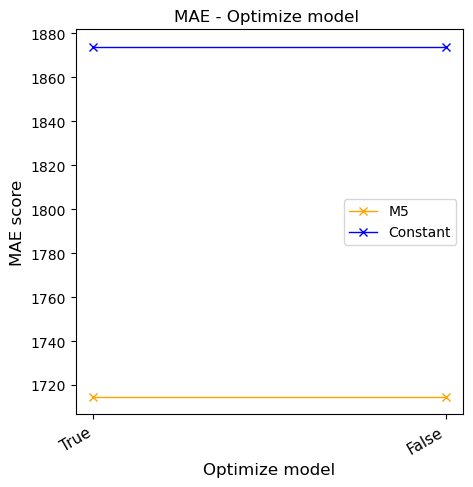

In [90]:
#Graph Nr attributes per leave range
vals      = np.arange(len(optimized_model_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - Optimize model ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Optimize model",fontsize=12)
labels =optimized_model_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(optimized_model_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")

plt.legend(loc="best")
plt.title("MAE - Optimize model ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Optimize model",fontsize=12)
labels =optimized_model_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

The M5 model performs exactly the smae with and without improve model. We turn the improve model off. 

In [17]:
# Smooting on, and loop through k range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4
k =500
pruning=True
#pruning= True
smoothing_m5= True
smoothing_cons = False
optimized_model=False
#incremental_fit = False
incremental_fit_range=[False, True]
split_function="RMS"


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []

for incremental_fit in incremental_fit_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))


    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))   
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))
    
    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))

    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )

print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )


m5 r2 [0.8631319452344124, 0.8553506985571578] MAE [1714.6175662058388, 1748.0289709449567]
cons r2 [0.8379973907885712, 0.8379973907885712] MAE [1873.7398795302665, 1873.7398795302665]
m5 r2 train [0.979712975776368, 0.9717341293445803] MAE train [819.9514617509834, 962.2046459731724]
cons r2 train [0.9358383464735128, 0.9358383464735128] MAE train [1269.6387354639016, 1269.6387354639016]


<function matplotlib.pyplot.show(close=None, block=None)>

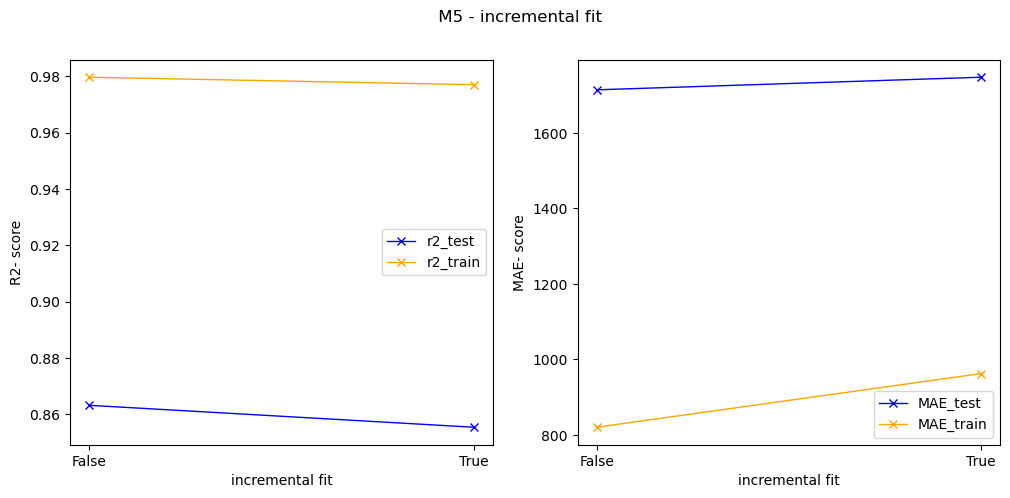

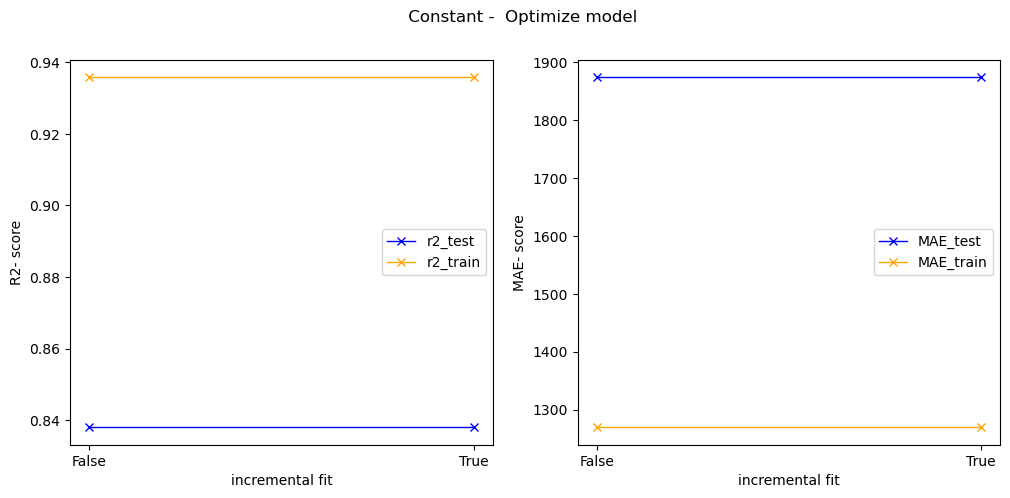

In [83]:
vals      = np.arange(len(incremental_fit_range))
labels =incremental_fit_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("incremental fit")
ax[1].set_xlabel("incremental fit")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - incremental fit ",fontsize=12)
plt.savefig("../figures/automobile/incremental_fit_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("incremental fit")
ax[1].set_xlabel("incremental fit")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant -  Optimize model",fontsize=12)
plt.savefig("../figures/automobile/incremental_fit_cons.jpeg")
plt.show

([<matplotlib.axis.XTick at 0x20ee4921c40>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

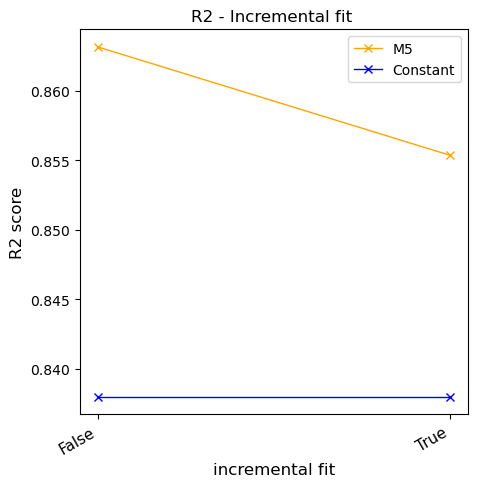

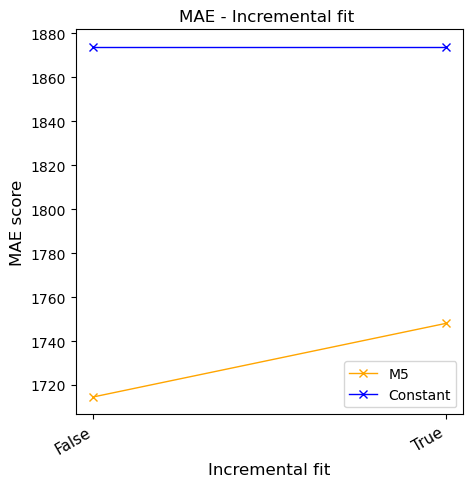

In [94]:
#Incremental fit
vals      = np.arange(len(incremental_fit_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - Incremental fit ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("incremental fit",fontsize=12)
labels =incremental_fit_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(optimized_model_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
#plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
#plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
#plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
#plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra tree")

plt.legend(loc="best")
plt.title("MAE - Incremental fit ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Incremental fit",fontsize=12)
labels =incremental_fit_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

The M5 model performs worse using the incremental fit. We turn the incremental fit off

In [18]:
# Smooting on, and loop through k range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4
k =500
pruning=False
#pruning= True
smoothing_m5= True
smoothing_cons = False
optimized_model=False
incremental_fit = False
split_function_range=["RMS", "SDR"]


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
m5_r2_train ,cons_r2_train =[], [] 
m5_MAE_train, cons_MAE_train = [], []


for split_function in split_function_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    M5regressor_r2_model_train, const_regressor_r2_train = [], []
    M5regressor_MAE_model_train , const_regressor_MAE_train =[],[]
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)
    
        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        M5regressor_r2_model_train.append(r2_score(y_train, reg.predict(X_train)))
        M5regressor_MAE_model_train.append(mean_absolute_error(y_train, reg.predict(X_train)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        const_regressor_r2_train.append(r2_score(y_train, reg2.predict(X_train)))
        const_regressor_MAE_train.append(mean_absolute_error(y_train, reg2.predict(X_train)))



    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))   
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))                                           

    m5_r2_train.append(np.mean(M5regressor_r2_model_train))
    cons_r2_train.append(np.mean(const_regressor_r2_train)) 
    m5_MAE_train.append(np.mean(M5regressor_MAE_model_train))
    cons_MAE_train.append(np.mean(const_regressor_MAE_train))
    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )


print("m5 r2 train", m5_r2_train, "MAE train", m5_MAE_train )
print("cons r2 train",cons_r2_train, "MAE train", cons_MAE_train  )

m5 r2 [0.8631319461065944, 0.8631319461077608] MAE [1714.6175530347834, 1714.617553027931]
cons r2 [0.8379973907885712, 0.8379973907885712] MAE [1873.7398795302665, 1873.7398795302665]
m5 r2 train [0.979712975776368, 0.979712975776368] MAE train [819.9514617509834, 819.9514617509834]
cons r2 train [0.9358383464735128, 0.9358383464735128] MAE train [1269.6387354639016, 1269.6387354639016]


<function matplotlib.pyplot.show(close=None, block=None)>

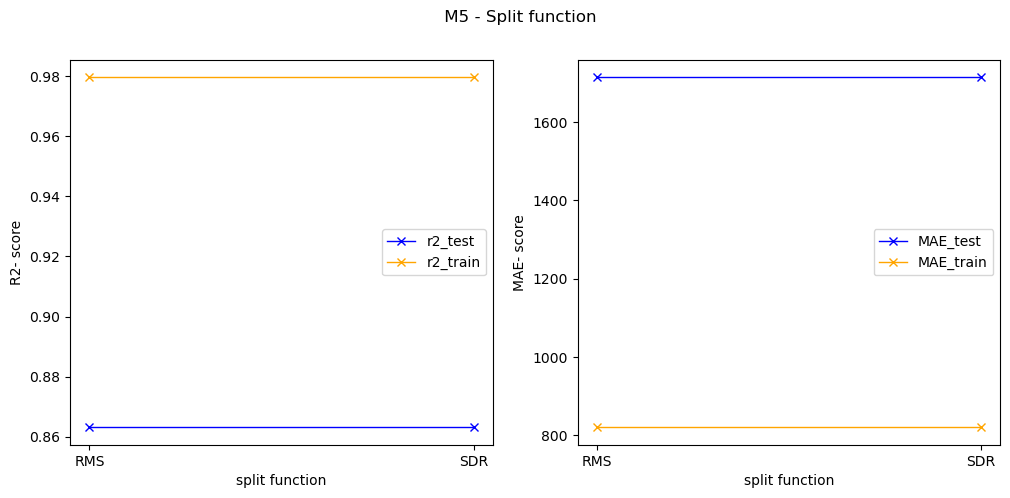

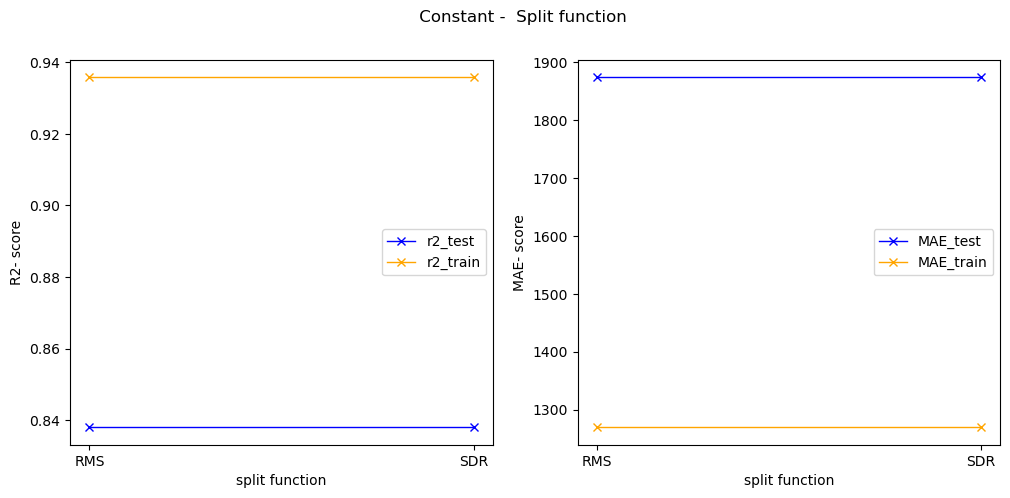

In [19]:
vals      = np.arange(len(split_function_range))
labels =split_function_range
fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, m5_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, m5_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, m5_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, m5_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("split function")
ax[1].set_xlabel("split function")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" M5 - Split function ",fontsize=12)
plt.savefig("../figures/automobile/split_function_m5.jpeg")
plt.show

fig, ax = plt.subplots(1,2, figsize = (12,5), sharex=False, sharey=False)
ax[0].plot(vals, cons_r2 , color="blue",marker="x", linewidth=1,label="r2_test")
ax[0].plot(vals, cons_r2_train , color="orange",marker="x", linewidth=1,label="r2_train")
ax[1].plot(vals, cons_MAE , color="blue",marker="x", linewidth=1,label="MAE_test")
ax[1].plot(vals, cons_MAE_train , color="orange",marker="x", linewidth=1,label="MAE_train")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("split function")
ax[1].set_xlabel("split function")
ax[0].set_ylabel("R2- score")
ax[1].set_ylabel("MAE- score")
ax[0].set_xticks(vals)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(vals)
ax[1].set_xticklabels(labels)
fig.suptitle(" Constant -  Split function",fontsize=12)
plt.savefig("../figures/automobile/split_functiom_cons.jpeg")
plt.show

# Compare with existing algorithms

In [99]:
# Smooting on, and loop through k range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4
k =500
pruning=False
#pruning= True
smoothing_m5= True
smoothing_cons = False
optimized_model=False
#incremental_fit = False
incremental_fit_range=[False]
split_function="RMS"


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []

for incremental_fit in incremental_fit_range:
    M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
    M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
    linear_tree_r2, linear_tree_MAE = [], []
    for train_index, test_index in kf.split(df):
        
        dataframe_nr=1
        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))

        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=n_attr_leaf_cons, max_depth= max_depth_cons, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree
        extra_tree_regressor = ExtraTreeRegressor(random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))
        #linear tree (model tree from Gitbhub) 
        linear_tree_regressor = LinearTreeRegressor(max_depth=max_depth_m5, min_samples_split=6, base_estimator=LinearRegression()).fit(X_train, y_train)  # supports also multi-target and sample_weights
        linear_tree_r2.append(r2_score(y_test, linear_tree_regressor.predict(X_test)))
        linear_tree_MAE.append(mean_absolute_error(y_test, linear_tree_regressor.predict(X_test)))
     


    m5_r2=(np.mean(M5regressor_r2_model))
    cons_r2=(np.mean(const_regressor_r2))   
    cons_sklearn_r2=(np.mean(const_regressor_sklearn_r2_model))   
    linear_r2=(np.mean(linear_regressor_r2))
    random_r2=(np.mean(random_forest_regressor_r2))
    extra_r2=(np.mean(extra_tree_r2))
    lintree_r2=(np.mean(linear_tree_r2))   
    m5_MAE=(np.mean(M5regressor_MAE_model))
    cons_MAE=(np.mean(const_regressor_MAE))                                           
    cons_sklearn_MAE=(np.mean(const_regressor_sklearn_MAE_model))   
    linear_MAE=(np.mean(linear_regressor_MAE))
    random_MAE=(np.mean(random_forest_regressor_MAE))
    extra_MAE=(np.mean(extra_tree_MAE))
    lintree_MAE=np.mean(linear_tree_MAE)
    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)
print("linear tree", lintree_r2, "MAE", lintree_MAE)

m5 r2 0.8631319461065944 MAE 1714.6175530347834
cons r2 0.8379973907885712 MAE 1873.7398795302665
cons_sklearn r2 0.6927712954008587 MAE 2684.3401522408217
linear r2 0.8271222266164389 MAE 1850.0511886049808
random r2 0.8794325819647583 MAE 1598.861756740196
extra r2 0.7286407103197465 MAE 2438.125735294118
extra r2 0.7286407103197465 MAE 2438.125735294118
linear tree -21.276872162064716 MAE 13786.198510015258


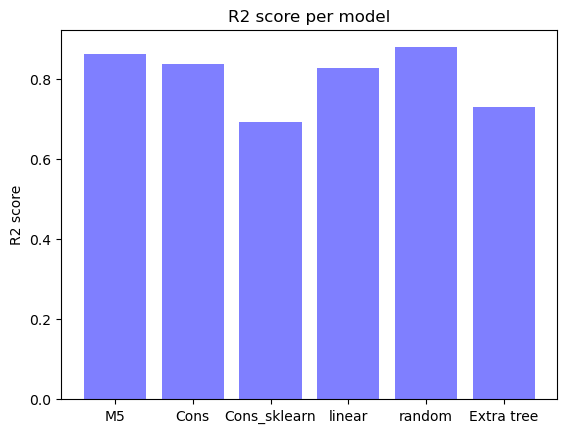

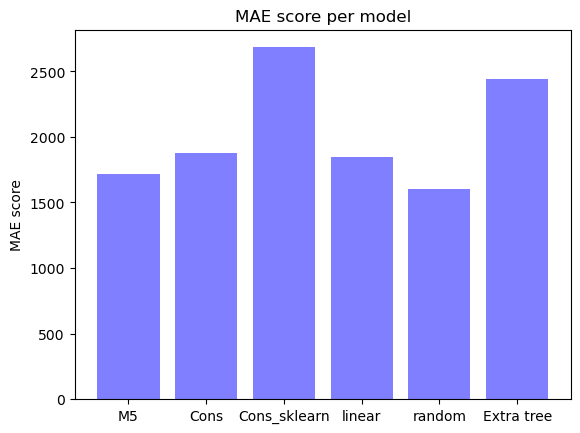

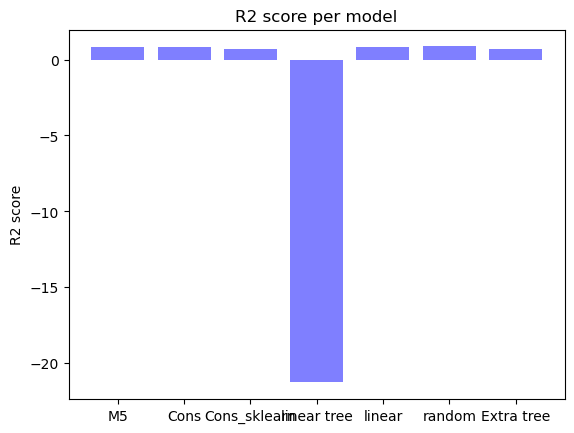

Text(0.5, 1.0, 'MAE score per model')

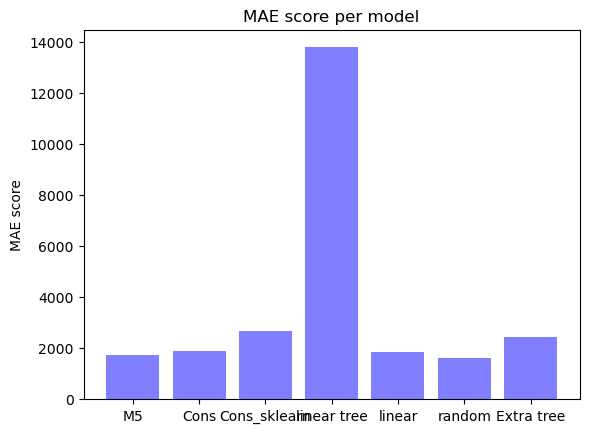

In [104]:
objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2, cons_r2, cons_sklearn_r2,  linear_r2, random_r2, extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE,  linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('MAE score')
plt.title('MAE score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2, cons_r2, cons_sklearn_r2, lintree_r2, linear_r2, random_r2, extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE, lintree_MAE, linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('MAE score')
plt.title('MAE score per model')

# Run the final models on the validation set

In [29]:
# Smooting on, and loop through k range
import warnings
warnings.filterwarnings('ignore')
max_depth_cons=5
max_depth_m5=15
n_attr_leaf_cons= 20
n_attr_leaf_m5  = 4
k =500
pruning=True
#pruning= True
smoothing_m5= True
smoothing_cons = False
optimized_model=False
#incremental_fit = False
incremental_fit_range=[False]
split_function="RMS"

# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]
lintree_MAE, lintree_r2 =  [], []
times = {"M5":-1, "cons":-1, "cons_sk":-1, "lineartree":-1, "linear":-1, "random_forest":-1, "extratree":-1}

for incremental_fit in incremental_fit_range:
        M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
        M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
        linear_tree_r2, linear_tree_MAE = [], []
    
        df_train_imputed3NN = df
        imputer = KNNImputer(n_neighbors=3)
        df_train_imputed3NN =pd.DataFrame(imputer.fit_transform(df_train_imputed3NN), index=df.index, columns=df.columns)
        total_dataset = df_train_imputed3NN.append(df_test)
        total_dataset = pd.DataFrame(imputer.fit_transform(total_dataset), index=total_dataset.index, columns=total_dataset.columns)
        df_imputed3NN_test = total_dataset.iloc[df_test.index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed3NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed3NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        

        X_train, y_train, X_test, y_test = preprocessing(dataframe_nr, df, train_index, test_index)

        #M5 regressor tree own
        start = timeit.default_timer()
        reg = M5regressor(smoothing=smoothing_m5, n_attr_leaf=n_attr_leaf_m5 , max_depth= max_depth_m5 ,k=k,pruning=pruning,optimize_models=optimized_model, split_function=split_function, incremental_fit=incremental_fit).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        times["M5"] = timeit.default_timer()-start
        #Constant regressor tree own
        start = timeit.default_timer()
        reg2 = Const_regressor(n_attr_leaf = n_attr_leaf_cons, max_depth=max_depth_cons, smoothing=smoothing_cons, k=k, split_function=split_function, pruning=pruning).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        times["cons"] = timeit.default_timer()-start

        #Constant regressor tree SKlearn
        start = timeit.default_timer()
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=n_attr_leaf_cons, max_depth= max_depth_cons, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        times["cons_sk"] = timeit.default_timer()-start
        
        #linear tree (model tree from Gitbhub)
        start = timeit.default_timer()
        linear_tree_regressor = LinearTreeRegressor(max_depth=max_depth_m5, min_samples_split=6, base_estimator=LinearRegression()).fit(X_train, y_train)  # supports also multi-target and sample_weights
        linear_tree_r2.append(r2_score(y_test, linear_tree_regressor.predict(X_test)))
        linear_tree_MAE.append(mean_absolute_error(y_test, linear_tree_regressor.predict(X_test)))
        times["lineartree"] = timeit.default_timer()-start 
        
        #Linear regression sklearn
        start = timeit.default_timer()
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        times["linear"] = timeit.default_timer()-start
        
        # Random forrest regressor
        start = timeit.default_timer()
        random_forest_regressor = RandomForestRegressor(random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        times["random_forest"] = timeit.default_timer()-start
        #Extra tree
        start = timeit.default_timer()
        extra_tree_regressor = ExtraTreeRegressor(random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))
        times["extratree"] = timeit.default_timer()-start


        m5_r2=(np.mean(M5regressor_r2_model))
        cons_r2=(np.mean(const_regressor_r2))   
        cons_sklearn_r2=(np.mean(const_regressor_sklearn_r2_model))   
        linear_r2=(np.mean(linear_regressor_r2))
        random_r2=(np.mean(random_forest_regressor_r2))
        extra_r2=(np.mean(extra_tree_r2))
        lintree_r2=(np.mean(linear_tree_r2))   
        m5_MAE=(np.mean(M5regressor_MAE_model))
        cons_MAE=(np.mean(const_regressor_MAE))                                           
        cons_sklearn_MAE=(np.mean(const_regressor_sklearn_MAE_model))   
        linear_MAE=(np.mean(linear_regressor_MAE))
        random_MAE=(np.mean(random_forest_regressor_MAE))
        extra_MAE=(np.mean(extra_tree_MAE))
        lintree_MAE=np.mean(linear_tree_MAE)
    
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)
print("linear tree", lintree_r2, "MAE", lintree_MAE)

m5 r2 0.8945870725644826 MAE 1972.673746725627
cons r2 0.901180419095953 MAE 2346.825460658247
cons_sklearn r2 0.5053416213339885 MAE 4911.761935763889
linear r2 0.8922120380427041 MAE 1997.3817247421268
random r2 0.8972226668340229 MAE 2376.316458333333
extra r2 0.5820550992312195 MAE 3839.645833333333
linear tree -7.926697071365748 MAE 17613.247672182617


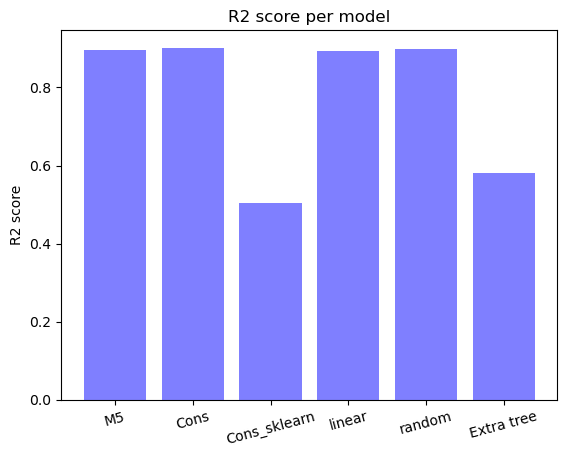

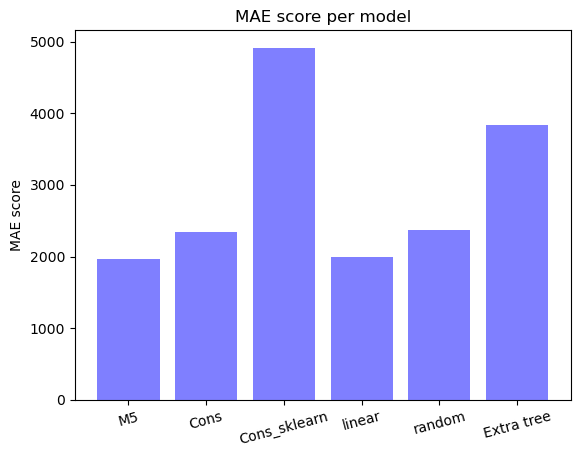

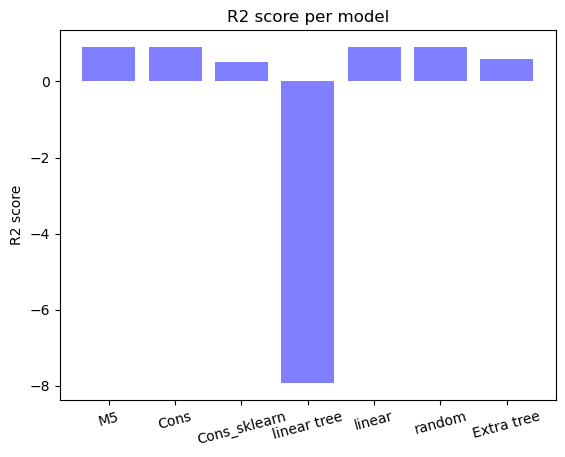

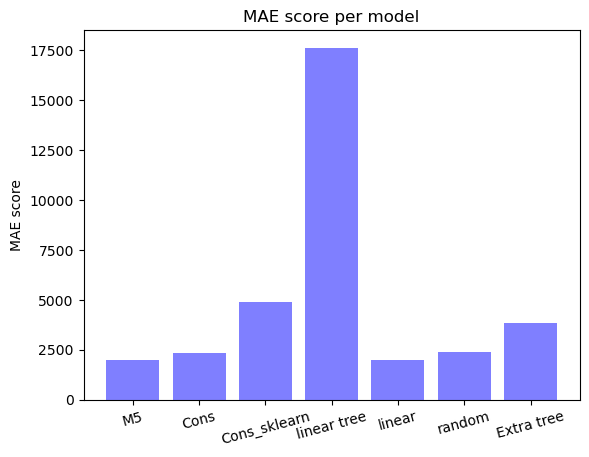

In [54]:
objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2, cons_r2, cons_sklearn_r2,  linear_r2, random_r2, extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.savefig("../figures/automobile/evaulation_r2_nolineartree.jpeg")
plt.show()


objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE,  linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)
plt.ylabel('MAE score')
plt.title('MAE score per model')
plt.savefig("../figures/automobile/evaulation_MAE_no lineartree.jpeg")
plt.show()


objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2, cons_r2, cons_sklearn_r2, lintree_r2, linear_r2, random_r2, extra_r2]

plt.bar(y_pos, r2Score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.savefig("../figures/automobile/evaulation_r2totaljpeg")
plt.show()


objects = ('M5', 'Cons', 'Cons_sklearn', 'linear tree', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE, lintree_MAE, linear_MAE,random_MAE,extra_MAE]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)
plt.ylabel('MAE score')
plt.title('MAE score per model')
plt.savefig("../figures/automobile/evaulation_MAE_total.jpeg")



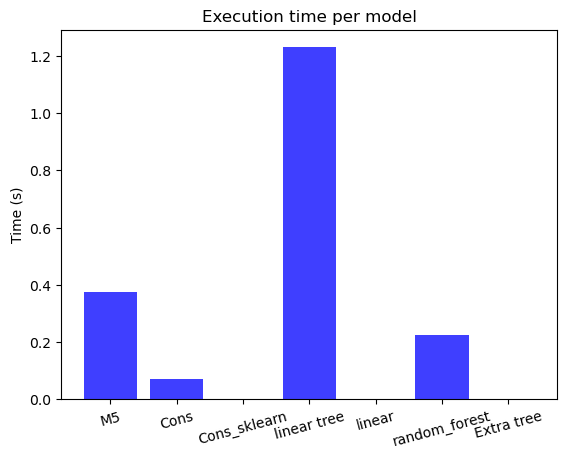

In [53]:
objects = ('M5', 'Cons', 'Cons_sklearn','linear tree', 'linear', 'random_forest', 'Extra tree')
y_pos = np.arange(len(objects))

plt.bar(y_pos, times.values(), align='center', alpha=0.5, color='blue')
y_pos = np.arange(len(objects))
Y = [(times['M5']), (times['cons']), (times['cons_sk']), (times['lineartree']), (times['linear']), (times['random_forest']), (times['extratree'])]
plt.bar(y_pos, Y, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)
plt.ylabel('Time (s)')
plt.title('Execution time per model')
plt.savefig("../figures/automobile/evaulation_timing.jpeg")

Finally running the final models on the test data which was kept aside from the beginning there are 4 models which perform fairly similar, looking at the R2.On the MAE the M5 models performs best. . 

The M5, constant regressor, linear regression and random forest both have an r2 of around 0.9.

It is intersting to see how well the standrad linear regression does in this dataset. 

Furthermore has to be said that the optimization of the models is focussed on our algorithms. No parameter tuning for the other algorithms was done. 

In [55]:
print(times)

{'M5': 0.3763424139997369, 'cons': 0.07228865599972778, 'cons_sk': 0.0018374890000814048, 'lineartree': 1.2287548089998381, 'linear': 0.00145384000006743, 'random_forest': 0.22629636200008463, 'extratree': 0.0015733790000922454}
